# <a id='toc1_'></a>[Исследование объявлений о продаже недвижимости](#toc0_)


**Кликабельное оглавление**<a id='toc0_'></a> 

- [Исследование объявлений о продаже недвижимости](#toc1_)
  - [Подключение библиотек и знакомство с данными](#toc1_1_)
  - [Предобработка данных](#toc1_2_)
    - [Обработка пропусков](#toc1_2_1_)
    - [Переиминование столбцов и смена типа данных](#toc1_2_2_)
  - [Добавление новых столбцов в таблицу](#toc1_3_)
  - [Исследовательский анализ данных:](#toc1_4_)
    - [Исследование данных на аномалии, отбрасывание редких значений](#toc1_4_1_)
    - [Выявление наиболее частых значений каждой из характеристик](#toc1_4_2_)
    - [Исследование скорости продажи недвижимости](#toc1_4_3_)
    - [Определение факторов, влияющих на стоимость квартиры](#toc1_4_4_)
    - [Выбор 10 населённых пунктов с наибольшим числом объявлений](#toc1_4_5_)
    - [Анализ стоимости жилья в Санкт-Петербурге в зависимости от удалённости до центра](#toc1_4_6_)
  - [Общий вывод](#toc1_5_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


<b>Задача:</b> Провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену недвижимости.


## <a id='toc1_1_'></a>[Подключение библиотек и знакомство с данными](#toc0_)

<a class="anchor" id="chapter0"></a>


Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Настройки

In [2]:
# Отвечает за отображение всех столбцов
pd.set_option("display.max_columns", None)

Чтение данных

In [3]:
try:
    # Локальное чтение
    data = pd.read_csv("datasets/real_estate_data.csv", sep="\t")
except:
    # Чтение данных с сервера
    data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [4]:
# Получение общей информации о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Получение общей информации о данных внутри датафрейма

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# Вывод первых 5 строк

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


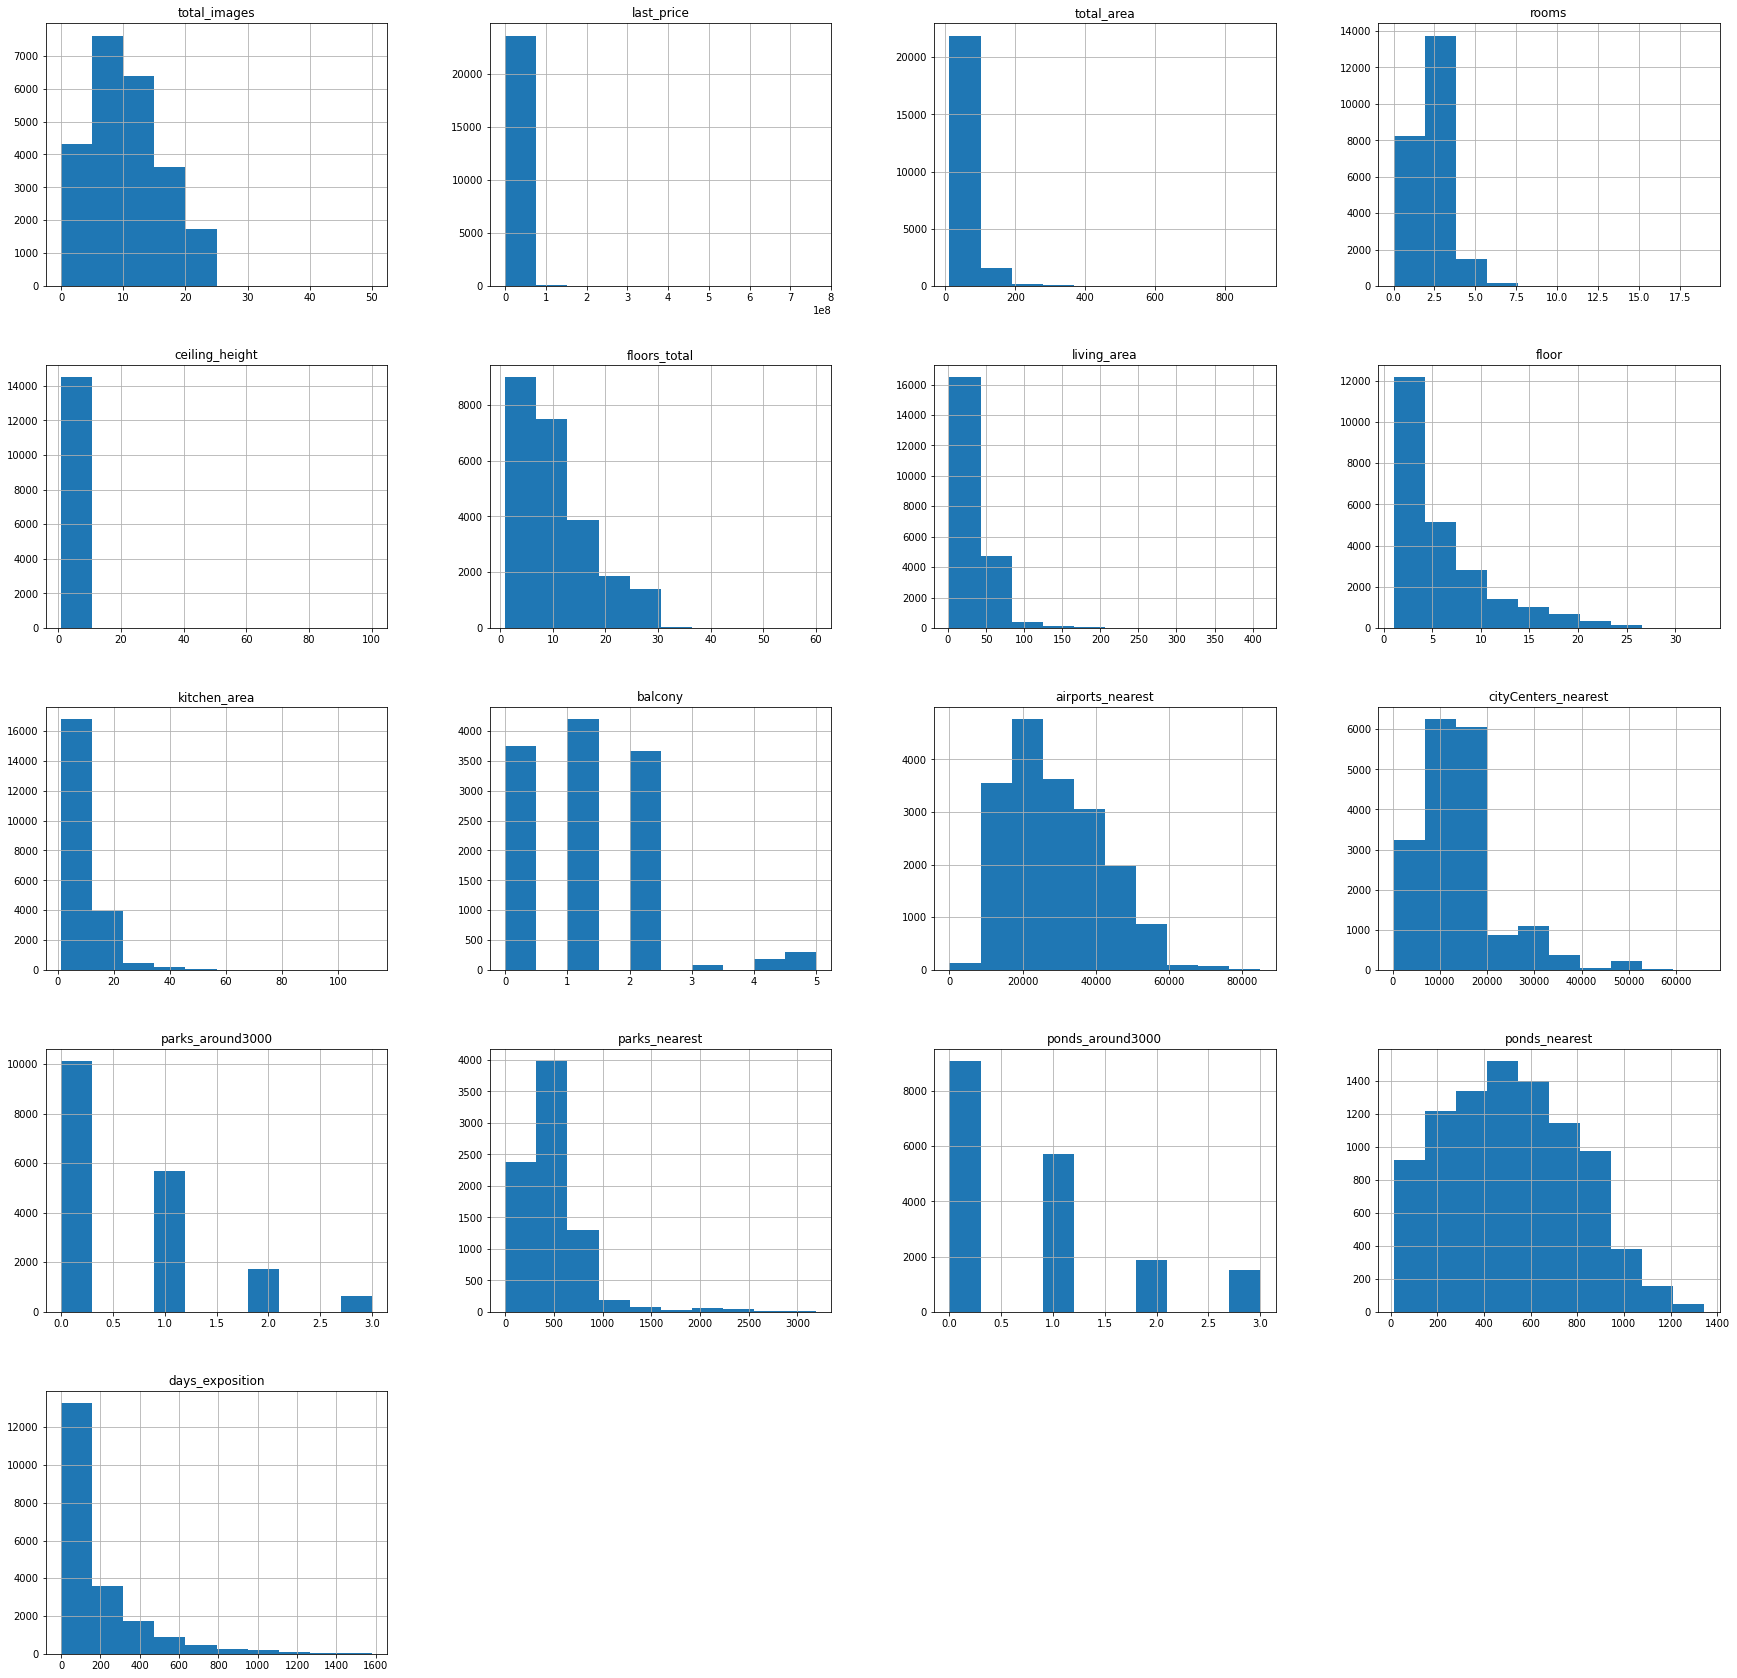

In [7]:
# Визуализация каждого из столбцов

data.hist(figsize=(30, 30))
plt.show()

#### <a id='toc1_1_1_1_'></a>[Вывод раздела](#toc0_)

Дано 22 характеристики жилья. Всего есть 23699 записей о недвижемости.
В данных имеются пропуски, например в столбцах `is_apartment` и `floors_total`. Есть аномальные значения в столбцах `ceiling_height` и `rooms`.
Отрицательных чисел в данных нет


## <a id='toc1_2_'></a>[Предобработка данных](#toc0_)

<a class="anchor" id="chapter1"></a>


### <a id='toc1_2_1_'></a>[Обработка пропусков](#toc0_)


#### <a id='toc1_2_1_1_'></a>[Обработка пропусков в столбцах `locality_name`, `balcony`, `is_apartment`, `floors_total`](#toc0_)


Удалим 50 строк с пропусками в столбце `locality_name`, так как их всего 50 из 23699 это не сильно повлияет на результат


In [8]:
data = data.dropna(subset=["locality_name"])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Если продавец не указал число балконов, то, скорее всего, в его объете недвижимости их нет. Если тип аппартаменты не указан: вероятно, недвижимость - не аппартаменты. Такие пропуски можно заменить на число 0 или на False соотвественно.


In [9]:
data["balcony"] = data["balcony"].fillna(0)
data["is_apartment"] = data["is_apartment"].fillna(False)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Удалим 100 строк с пропусками в столбце `floors_total`, так как их всего 100 из 23699 это не сильно повлияет на результат.


In [10]:
data = data.dropna(subset=["floors_total"])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### <a id='toc1_2_1_2_'></a>[Заполнение пропусков в `ceiling_height` медианными значениями](#toc0_)


Обзор количества строк в столбце `ceiling_height`

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [12]:
data["ceiling_height"] = data["ceiling_height"].fillna(data["ceiling_height"].median())

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Пропусков больше нет


#### <a id='toc1_2_1_3_'></a>[Обработка пропусков в `days_exposition`](#toc0_)


Заметим, что в столбце `days_exposition` нет значений 0, это значит, что если квартира продается меньше дня, то в этом столбце будет пропуск. Было бы логично заменить пропуски на 0, однако тогда 10% квартир (23650 - 20394.000000) будут продаваться в первый день, что очень неправдаподобно, поэтому пропуски лучше оставить так как причины их появления неизвестны.


#### <a id='toc1_2_1_4_'></a>[Заполнение `living_area` близкими значениями в зависимости от total_area](#toc0_)


Рассмотрим корреляцию "living_area" с другими характеристиками, чтобы понять на какие данные можно опереться при заполнении пропусков.


In [13]:
# Так как из-за удаления пропусков в предыдущих столбцах корреляция могла измениться, то нужно пересчитать матрицу корреляции

correlation_matrix = data.select_dtypes(exclude=["object"]).corr()
correlation_matrix["living_area"].sort_values(ascending=False)

living_area            1.000000
total_area             0.939771
rooms                  0.846117
last_price             0.566380
kitchen_area           0.428909
parks_around3000       0.184878
ponds_around3000       0.149785
days_exposition        0.142135
total_images           0.105551
ceiling_height         0.078636
is_apartment           0.027017
balcony               -0.014786
open_plan             -0.033756
parks_nearest         -0.050694
studio                -0.056307
airports_nearest      -0.057428
ponds_nearest         -0.082830
floor                 -0.096676
floors_total          -0.168940
cityCenters_nearest   -0.230576
Name: living_area, dtype: float64

Видим, что жилая площадь на 94% коррелирует с общей площадью. Посмотрим, на сколько процентов жилая площадь меньше общей и отобразим это на графике


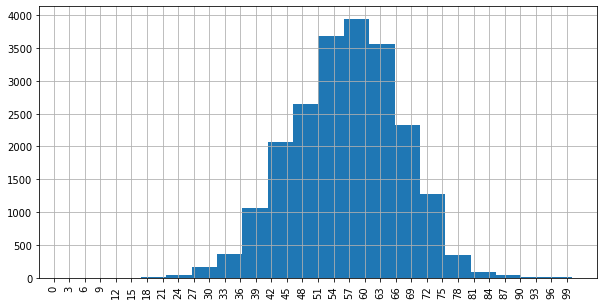

In [14]:
data_droped_living_area = data.dropna(subset=["living_area"])
total_living_area_diffence = (
        data_droped_living_area["living_area"] * 100 / data_droped_living_area["total_area"]
)
total_living_area_diffence.hist(bins=20, figsize=(10, 5))

# Генерация новых штрихов штрихов на оси x
new_ticks = [i for i in range(0, 101, 3)]
# Установка новых штрихов на оси x
plt.gca().set_xticks(new_ticks)
# Подпись новых штрихов на оси x
plt.gca().set_xticklabels(new_ticks, rotation=90)
a = ""

Видим, что чаще всего жилая площадь составляет 60% от общей, опираясь на эти данные, заполним пропуски


In [15]:
data.loc[data["living_area"].isna(), "living_area"] = (
        data.loc[data["living_area"].isna(), "total_area"] * 0.6
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### <a id='toc1_2_1_5_'></a>[Обработка пропусков в `kitchen_area`](#toc0_)


Проверим гипотезу о том, что пропуски в столбце `kitchen_area` зависят от того, является ли квартира студией


In [16]:
# describe_parser преобразует data.describe в словарь, где первый ключ название столбца в data.describe вроде total_images, а второй ключ название строки в data.describe, например count. В возвращенном словарe (для примера его название будет returned_dict) returned_dict[total_images][count] вернет то значение, которое было в строке count, столбце total_images в исходном data.describe()


def describe_parser(data):
    data = data.T
    new_data = {}

    for index, column_name in enumerate(data.index):
        new_data[column_name] = {}
        for value_index, value in enumerate(data.columns):
            new_data[column_name][value] = data.iloc[index, value_index]
    return new_data


# Вывод таблицы, в которой легко увидеть различие значений таблиц describe трех таблиц, в первой мы отобрали только строки где квартира - студия, во второй, только строки где квартира не студия, в третьей, только квартиры с пропущенными значениями на месте площади

studio_true_description_dict = describe_parser(
    data.query("studio == True").describe())
studio_false_description_dict = describe_parser(
    data.query("studio == False").describe()
)
kitchen_area_isna_description_dict = describe_parser(
    data.query("kitchen_area.isna()").describe()
)

print_arguments = [
    "column_name",
    "value_name",
    "kitchen_is_nan",
    "studio_false",
    "studio_true",
]

for column_name in kitchen_area_isna_description_dict:
    # Вывод оглавления вида
    # column_name          | value_name | kitchen_is_nan      | studio_false        | studio_true
    # ----------------------------------------------------------------------------------------------------
    print("\n\n")
    print(
        f"{print_arguments[0]:<20} | {print_arguments[1]:<10}",
        "|",
        f"{print_arguments[2]:<19}",
        "|",
        f"{print_arguments[3]:<19}",
        "|",
        f"{print_arguments[4]:<19}",
    )
    print("-" * 100)
    # Вывод оглавления закончен

    for value_name in kitchen_area_isna_description_dict[column_name]:
        try:
            # Вывод значений
            # Пример: days_exposition      | count      | 0.0                 | 23414.0             | 146.0
            print(
                f"{column_name:<20} | {value_name:<10}",
                "|",
                f"{kitchen_area_isna_description_dict[column_name][value_name]:<19}",
                "|",
                f"{studio_false_description_dict[column_name][value_name]:<19}",
                "|",
                f"{studio_true_description_dict[column_name][value_name]:<19}",
            )
            # Вывод значений закончен

        except:
            print(f"{column_name:<20} | {value_name:<10}",
                  "| ошибка всей строки")




column_name          | value_name | kitchen_is_nan      | studio_false        | studio_true        
----------------------------------------------------------------------------------------------------
total_images         | count      | 2222.0              | 23419.0             | 146.0              
total_images         | mean       | 8.171017101710172   | 9.891071352320765   | 7.8493150684931505 
total_images         | std        | 5.545725503922659   | 5.683683523193874   | 4.866978763694592  
total_images         | min        | 0.0                 | 0.0                 | 0.0                
total_images         | 25%        | 4.0                 | 6.0                 | 4.0                
total_images         | 50%        | 8.0                 | 9.0                 | 7.0                
total_images         | 75%        | 12.0                | 14.0                | 11.0               
total_images         | max        | 21.0                | 50.0                | 20.0            

Видим, что недвижимость типа "не студия", больше похоже на недвижимость с пропусками в столбце `kitchen_area` чем недвижимость типа "студия".
Это доказывают строки:
![image.png](2024-02-03_12-05-09.png)
Значит, посмотрим корреляцию `kitchen_area` с характеристиками жилья и в зависимости от этого заполним пропуски. Будем смотреть корреляция со всем жильем, и студиями, и не студиами так как квартир студий мало и они не сильно повлияют на результат


In [17]:
# Так как из-за удаления пропусков в предыдущих столбцах корреляция могла измениться, то нужно пересчитать матрицу корреляции

correlation_matrix = data.select_dtypes(exclude=["object"]).corr()
correlation_matrix["kitchen_area"].sort_values(ascending=False)

kitchen_area           1.000000
total_area             0.609248
last_price             0.520362
living_area            0.436870
rooms                  0.270342
floors_total           0.164803
ponds_around3000       0.151156
floor                  0.136545
total_images           0.106896
days_exposition        0.101071
parks_around3000       0.088512
ceiling_height         0.071585
is_apartment           0.049224
balcony                0.046207
parks_nearest          0.029578
airports_nearest       0.007797
ponds_nearest         -0.104674
cityCenters_nearest   -0.191140
studio                      NaN
open_plan                   NaN
Name: kitchen_area, dtype: float64

Видим, что площадь кухни на 60% зависит от общей площади квартиры. Узнаем сколько в среднем составляет площадь кухни от общей площади квартиры


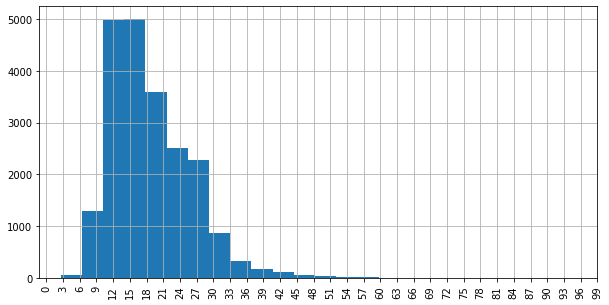

In [18]:
data_droped_kitchen_area = data.dropna(subset=["kitchen_area"])
total_kitchen_area_diffence = (
        data_droped_kitchen_area["kitchen_area"]
        * 100
        / data_droped_kitchen_area["total_area"]
)
total_kitchen_area_diffence.hist(bins=20, figsize=(10, 5))

# Генерация новых штрихов
new_ticks = [i for i in range(0, 101, 3)]

# Установка новых штрихов на оси x
plt.gca().set_xticks(new_ticks)
# Подпись новых штрихов на оси x
plt.gca().set_xticklabels(new_ticks, rotation=90)
a = ""

Чаще всего жилая площадь составляет 17% от общей, опираясь на эти данные, заполним пропуски


In [19]:
data.loc[data["kitchen_area"].isna(), "kitchen_area"] = (
        data.loc[data["kitchen_area"].isna(), "total_area"] * 0.6
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### <a id='toc1_2_1_6_'></a>[Обработка пропусков в столбцах данные в которых были собраны автоматизированной системой: `airports_nearest`, `cityCenters_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`.](#toc0_)


Для `ponds_around_3000` и `parks_around_3000` проверим, возможно пропуски вызваны тем, что автоматизированная система не вносила те случаи, когда таких объектов вблизи нет и следует указать 0.


In [20]:
for column_index_and_name in enumerate(["parks_nearest", "ponds_nearest"]):
    column_index = column_index_and_name[0]
    column_name = column_index_and_name[1]

    data[column_name] = pd.to_numeric(data[column_name], errors="coerce")

    facility_around_3000 = ["parks_around3000", "ponds_around3000"]
    print(
        data.loc[data[column_name] > 3000, facility_around_3000[column_index]]
        .isna()
        .count()
    )

4
0


Для `ponds_around_3000` и `parks_around_3000` неправда, что пропуски вызваны не внесением случаев, когда таких объектов вблизи нет и следует указать 0.


Посмотрим на корреляцию между `ponds_around3000`, `ponds_nearest`, `parks_around3000`, `parks_nearest`, `airports_nearest`, `cityCenters_nearest` и другими параметрами.


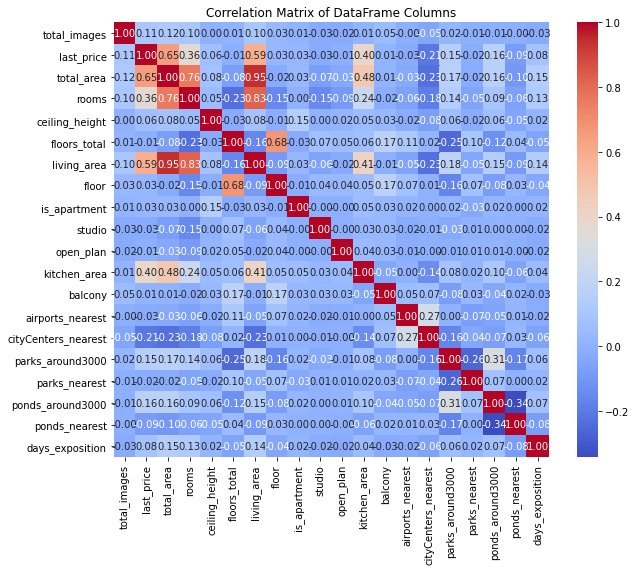

In [21]:
corr_matrix = data.select_dtypes(exclude="object").corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of DataFrame Columns")
plt.show()

|Корреляция слабая, очевидной причины почему появились пропуски нет - оставим их.


#### <a id='toc1_2_1_7_'></a>[Вывод раздела "Обработка пропусков"](#toc0_)


Были найдены пропуски в столбцах `locality_name`, `balcony`, `is_apartment`, `floors_total`, `living_area`, `living_area`, `kitchen_area`, `days_exposition`, `ponds_around3000`, `parks_around3000`, `parks_nearest`, `ponds_nearest`, `airports_nearest`, `cityCenters_nearest`.

- **В столбце `locality_name` пропуски были удалены, так как их всего 50 из 23699 это не сильно повлияет на результат.** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `balcony` пропуски были заменены на 0,** так как если продавец не указал число балконов, то, скорее всего, в его объете недвижимости их нет.
  .
- **В столбце `is_apartment` пропуски были заменены на False, так как если тип аппартаменты не указан: вероятно, недвижимость - не аппартаменты.** Вероятнее всего пропуски вызваны тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `floors_total` пропуски были удалены, так как их всего 100 из 23699 это не сильно повлияет на результат.** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `ceiling_height` пропуски были заполнены медианным значением столбца** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `living_area` пропуски были заполнены в зависимости от общей площади квартиры.** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `kitchen_area` пропуски были заполнены в зависимости от общей площади квартиры.** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбце `days_exposition` пропуски оставлены** Здесь пропуски могут быть вызваны технической ошибкой или тем, что в форме сбора данных это поле заполнять не обязательно, и люди не посчитали нужным его заполнить.
  .
- **В столбцах `ponds_around3000`, `parks_around3000`, `parks_nearest`, `ponds_nearest`, `airports_nearest`, `cityCenters_nearest` пропуски оставлены, так как очевидной причины пропусков нет.** Они вызваны недоработкой автоматизированной системы сбора данных.


### <a id='toc1_2_2_'></a>[Переиминование столбцов и смена типа данных](#toc0_)


#### <a id='toc1_2_2_1_'></a>[Переиминование столбцов](#toc0_)


Переиминуем столбцы `ponds_around3000` и `parks_around3000` в `ponds_around_3000` и `parks_around_3000` для соответсвия формату snake_case


In [22]:
data.rename(
    columns={
        "ponds_around3000": "ponds_around_3000",
        "parks_around3000": "parks_around_3000",
    },
    inplace=True,
)

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### <a id='toc1_2_2_2_'></a>[Cмена типа данных](#toc0_)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заметим, что в столбцах: `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`, `days_exposition` - необходимо сделать замену типа данных.

1. В столбце `last_price` - стоит заменить тип данных на "целочисленное число" так как тут записаны числа больше чем миллион и дробная часть слишком мала, чтобы иметь вес.
2. В столбце `days_exposition` - стоит заменить тип данных на "целочисленное число" так как люди привыкли игнорировать дробную разницу между днями, например 10 и 10.5.
3. В столбце `floors_total` - стоит заменить тип данных на "целочисленное число" так как количество этажей не может быть не целым.
4. В столбцах `cityCenters_nearest`, `parks_around_3000`, `ponds_around_3000`, `balcony`, `airports_nearest` - стоит заменить тип данных на "целочисленное число" так как в случае с расстоянием люди привыкли игнорировать дробную разницу, а в случае с количеством объектов, например балконов, они не могут быть не целыми.
5. В столбце `first_day_exposition` - для удобной обработки стоит заменить строки на специальный формат даты в Pandas.
6. В столбцах `total_area`, `living_area`, `kitchen_area` - стоит заменить тип данных на "целочисленное число" так как для исследования не необходима точность с точностью до десятых.


In [24]:
# Выполняем замену типа данных в столбцах `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around_3000`, `ponds_around_3000`, `days_exposition`

int_assign_columns = [
    "last_price",
    "floors_total",
    "balcony",
    "airports_nearest",
    "cityCenters_nearest",
    "parks_around_3000",
    "ponds_around_3000",
    "days_exposition",
    "total_area",
    "living_area",
    "kitchen_area",
]

int_assign_error_columns = []

for column in int_assign_columns:
    try:
        data[column] = data[column].astype("int64")
    except Exception as e:
        print("Не удалось преобразовать столбец", column, "Ошибка:", e)
        int_assign_error_columns.append(column)
data.info()

Не удалось преобразовать столбец airports_nearest Ошибка: Cannot convert non-finite values (NA or inf) to integer
Не удалось преобразовать столбец cityCenters_nearest Ошибка: Cannot convert non-finite values (NA or inf) to integer
Не удалось преобразовать столбец parks_around_3000 Ошибка: Cannot convert non-finite values (NA or inf) to integer
Не удалось преобразовать столбец ponds_around_3000 Ошибка: Cannot convert non-finite values (NA or inf) to integer
Не удалось преобразовать столбец days_exposition Ошибка: Cannot convert non-finite values (NA or inf) to integer
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  int64  
 3   first_day_exposition  23565 non-null  object 
 4   rooms 

Видим, что тип данных в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` - невозможно сменить на "целое число", так как в этих столбцах есть пропуски, которые невозможно заполнить, опираясь на исходные данные.


Преобразуем `first_day_exposition` в формат даты pandas


In [25]:
data["first_day_exposition"] = pd.to_datetime(
    data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

#### <a id='toc1_2_2_3_'></a>[Удаление дубликатов строк](#toc0_)


Проверим наличие недвижимостей дубликатов во всей таблице


In [26]:
data.duplicated().sum()

0

Дубликатов недвижимости нет. Единственный столбец, в котором могут быть неявные дубликаты - `locality_name`, проверим его на неявные дубликаты.


#### <a id='toc1_2_2_4_'></a>[Поиск и удаление дубликатов в `locality_name`](#toc0_)


Сначала в этом столбце заменим букву е на ё и приведем данные к нижнему регистру.


In [27]:
data["locality_name"] = data["locality_name"].astype("str")
data["locality_name"] = data["locality_name"].str.replace("ё", "е")
data["locality_name"] = data["locality_name"].str.lower()

In [28]:
print(data["locality_name"].unique())

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'

Видим, что в столбце `locality_name` есть неявные дубликаты вида "Рябино" и "поселок Рябино", удалим их


In [29]:
data["locality_name"] = data["locality_name"].str.replace(
    "поселок городского типа ", ""
)

data["locality_name"] = data["locality_name"].str.replace("городской поселок ", "")

data["locality_name"] = data["locality_name"].str.replace("коттеджный поселок ", "")

data["locality_name"] = data["locality_name"].str.replace("поселок станции ", "")

data["locality_name"] = data["locality_name"].str.replace("село ", "")

data["locality_name"] = data["locality_name"].str.replace("поселок ", "")

data["locality_name"] = data["locality_name"].str.replace("деревня ", "")

print(data["locality_name"].unique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'федоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'садовое товарищество новая ропша' 'павловск' 'пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'
 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное село' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет'
 'сланцы' 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодежное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалево' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'ва

In [30]:
# Проверка целости данных

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

Как видно неявных дубликатов больше нет


#### <a id='toc1_2_2_5_'></a>[Вывод раздела "Переиминование столбцов и смена типа данных"](#toc0_)


- В столбцах `last_price`, `floors_total`, `balcony`, `days_exposition` - тип данных был заменен на "целочисленное число". В столбце `first_day_exposition` - тип данных был заменен на "дата".
- В столбце `locality_name` были удалены неявные дубликаты.
- Дубликаты строк в таблице не были найдены.


## <a id='toc1_3_'></a>[Добавление новых столбцов в таблицу](#toc0_)


Добавим в таблицу столбец цена одного квадратного метра `price_per_square_meter`


In [31]:
data["price_per_square_meter"] = data.apply(
    lambda row: round(row["last_price"] / row["total_area"], 2), axis=1
)

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.00
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159,2015-07-24,3,2.65,14,95,9,False,False,False,95,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


Добавим в таблицу столбец "день публикации", "месяц публикации", "год публикации" `publication_day`, `publication_month`, `publication_year`


In [32]:
data["publication_day"] = data["first_day_exposition"].dt.day
data["publication_month"] = data["first_day_exposition"].values.astype("datetime64[M]")
data["publication_year"] = data["first_day_exposition"].dt.year

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,publication_day,publication_month,publication_year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,7,2019-03-01,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.00,4,2018-12-01,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,20,2015-08-01,2015
3,0,64900000,159,2015-07-24,3,2.65,14,95,9,False,False,False,95,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,24,2015-07-01,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,19,2018-06-01,2018


Добавим в таблицу столбец `floor_category`: первый, последний, другой


In [33]:
def return_floor_category(row):
    if row["floor"] == 1:
        return "первый"
    if row["floor"] == row["floors_total"]:
        return "последний"
    return "другой"


data["floor_category"] = data.apply(return_floor_category, axis=1)

print(data["floor_category"].unique())
data.head(5)

['другой' 'первый' 'последний']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,publication_day,publication_month,publication_year,floor_category
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,7,2019-03-01,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.00,4,2018-12-01,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,20,2015-08-01,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14,95,9,False,False,False,95,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,24,2015-07-01,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,19,2018-06-01,2018,другой


Добавим расстояние до центра города в километрах `cityCenters_nearest_km`


In [34]:
data["cityCenters_nearest_km"] = round(data["cityCenters_nearest"] / 1000)

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,publication_day,publication_month,publication_year,floor_category,cityCenters_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,7,2019-03-01,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.00,4,2018-12-01,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,20,2015-08-01,2015,другой,14.0
3,0,64900000,159,2015-07-24,3,2.65,14,95,9,False,False,False,95,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,24,2015-07-01,2015,другой,7.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,19,2018-06-01,2018,другой,8.0


## <a id='toc1_4_'></a>[Исследовательский анализ данных:](#toc0_)


### <a id='toc1_4_1_'></a>[Исследование данных на аномалии, отбрасывание редких значений](#toc0_)


#### <a id='toc1_4_1_1_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `total_area`](#toc0_)


Рассмотрим распределение площадей недвижимости


<AxesSubplot:>

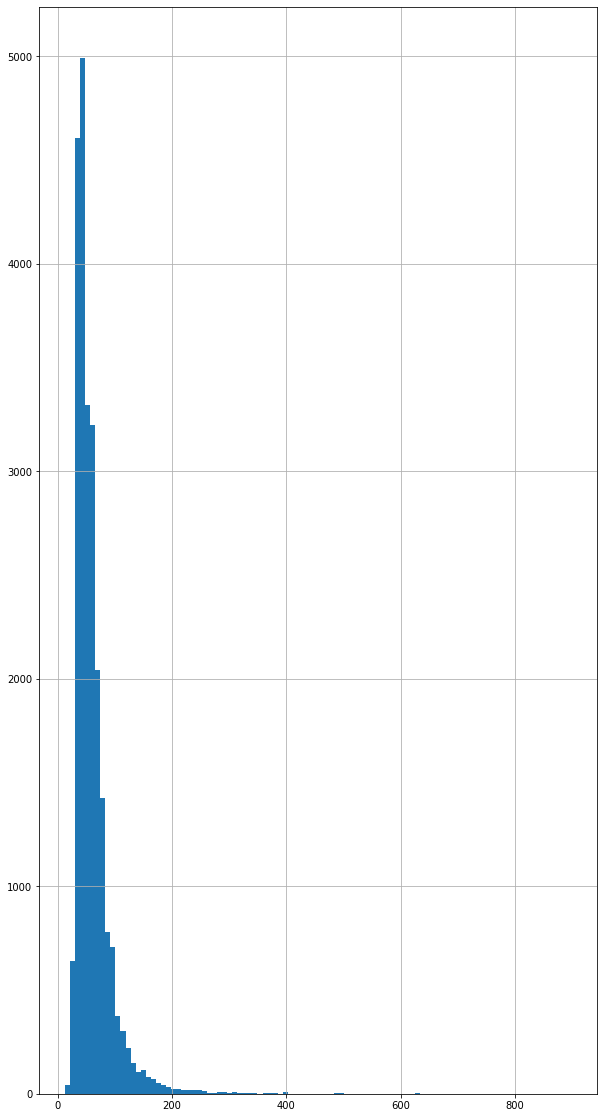

In [35]:
data["total_area"].hist(bins=100, figsize=(10, 20))

Видим, что есть аномальные значения, которые выходят за рамки 200 метров. Посмотрим на них подробнее


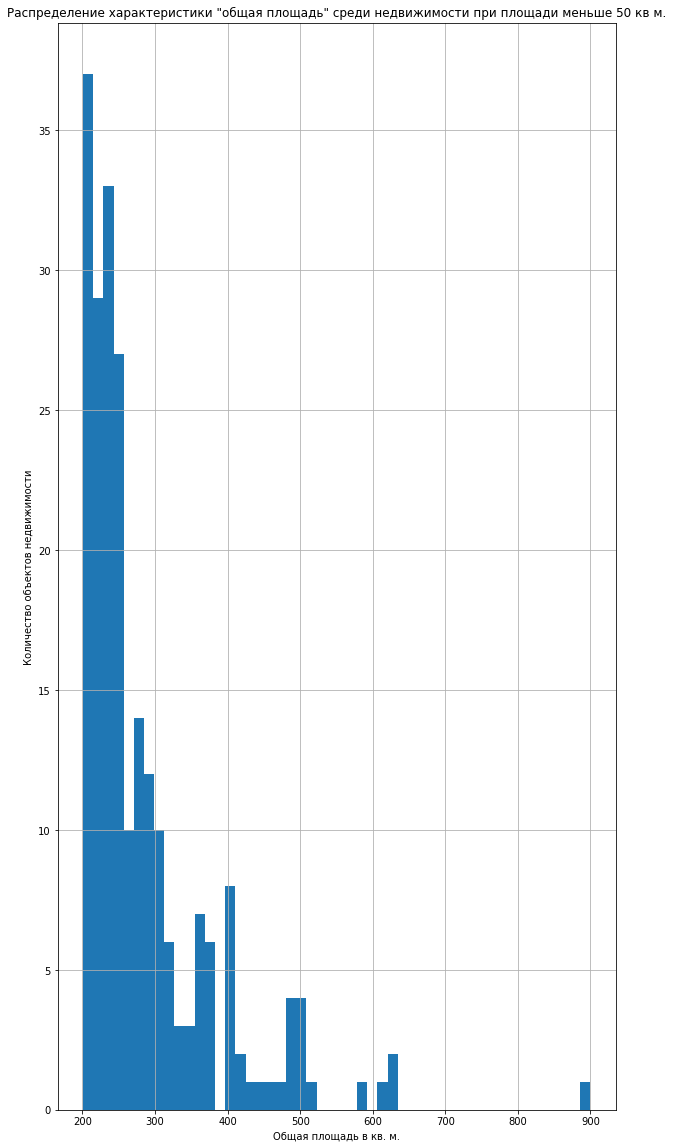

In [36]:
data.query("total_area > 200")["total_area"].hist(bins=50, figsize=(10, 20))
plt.title('Распределение характеристики "общая площадь" среди недвижимости при площади меньше 50 кв м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Общая площадь в кв. м.')
plt.show()

Значения больше 400 метров встречаются редко, отбросим строки с ними


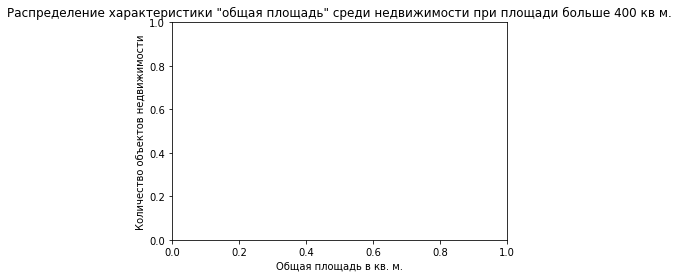

In [37]:
data = data.query("total_area <= 400")
plt.title('Распределение характеристики "общая площадь" среди недвижимости при площади больше 400 кв м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Общая площадь в кв. м.')
plt.show()

Рассмотрим площадь на слишком маленькие значения


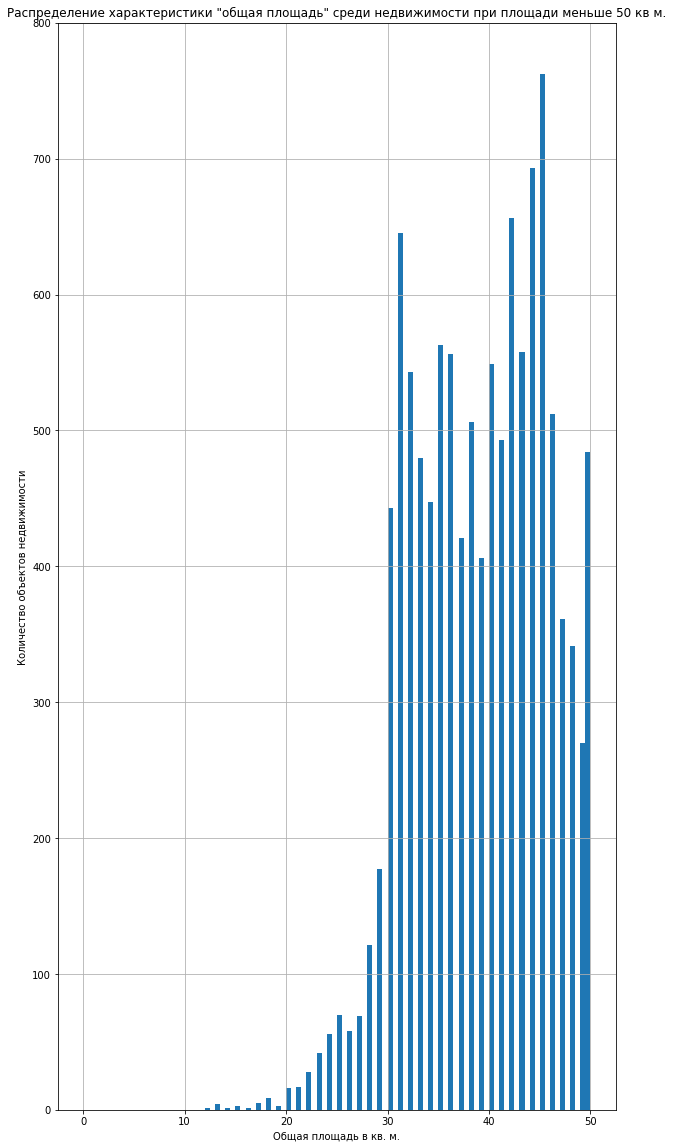

In [38]:
data["total_area"].hist(bins=100, figsize=(10, 20), range=(0, 50))
plt.title('Распределение характеристики "общая площадь" среди недвижимости при площади меньше 50 кв м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Общая площадь в кв. м.')
plt.show()

Отбросим строки с значениями меньше 20 квадратных метров


In [39]:
data = data.query("total_area >= 20")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23515 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23515 non-null  int64         
 1   last_price              23515 non-null  int64         
 2   total_area              23515 non-null  int64         
 3   first_day_exposition    23515 non-null  datetime64[ns]
 4   rooms                   23515 non-null  int64         
 5   ceiling_height          23515 non-null  float64       
 6   floors_total            23515 non-null  int64         
 7   living_area             23515 non-null  int64         
 8   floor                   23515 non-null  int64         
 9   is_apartment            23515 non-null  bool          
 10  studio                  23515 non-null  bool          
 11  open_plan               23515 non-null  bool          
 12  kitchen_area            23515 non-null  int64 

#### <a id='toc1_4_1_2_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `last_price`](#toc0_)


Рассмотрим общую картину цен на аномальные значения


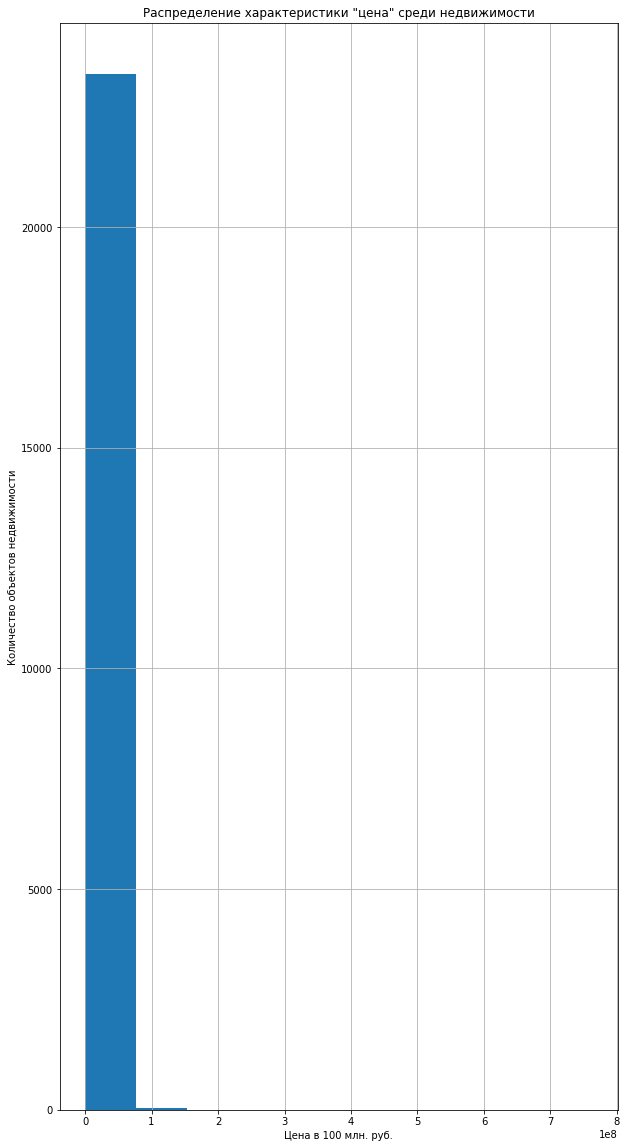

In [40]:
data["last_price"].hist(bins=10, figsize=(10, 20))

plt.title('Распределение характеристики "цена" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Цена в 100 млн. руб.')
plt.show()

Видим, что есть аномальные значения, которые выходят за рамки 99 миллионов. Отбросим строки с ними


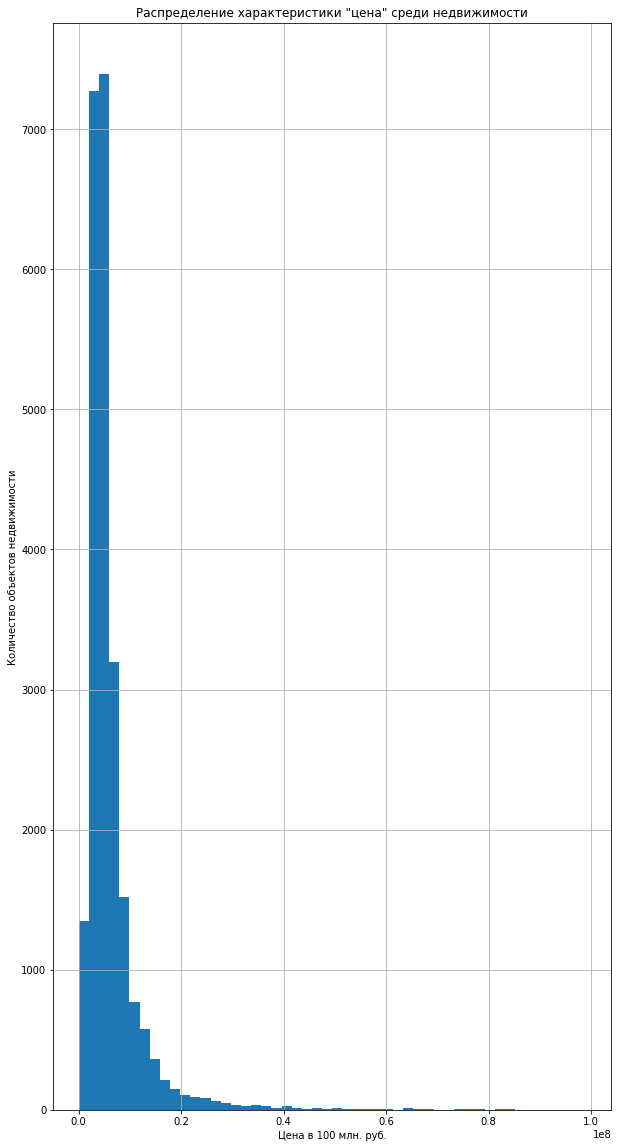

In [41]:
data = data.query("last_price <= 99000000")
data["last_price"].hist(bins=50, figsize=(10, 20))

plt.title('Распределение характеристики "цена" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Цена в 100 млн. руб.')
plt.show()

Видим, что значений, которые выходят за рамки 40 миллионов слишком мало, отбросим строки с ними, также рассмотрим те объекты, которые стоят меньше 10 миллионов для выявления слишком маленьких значений


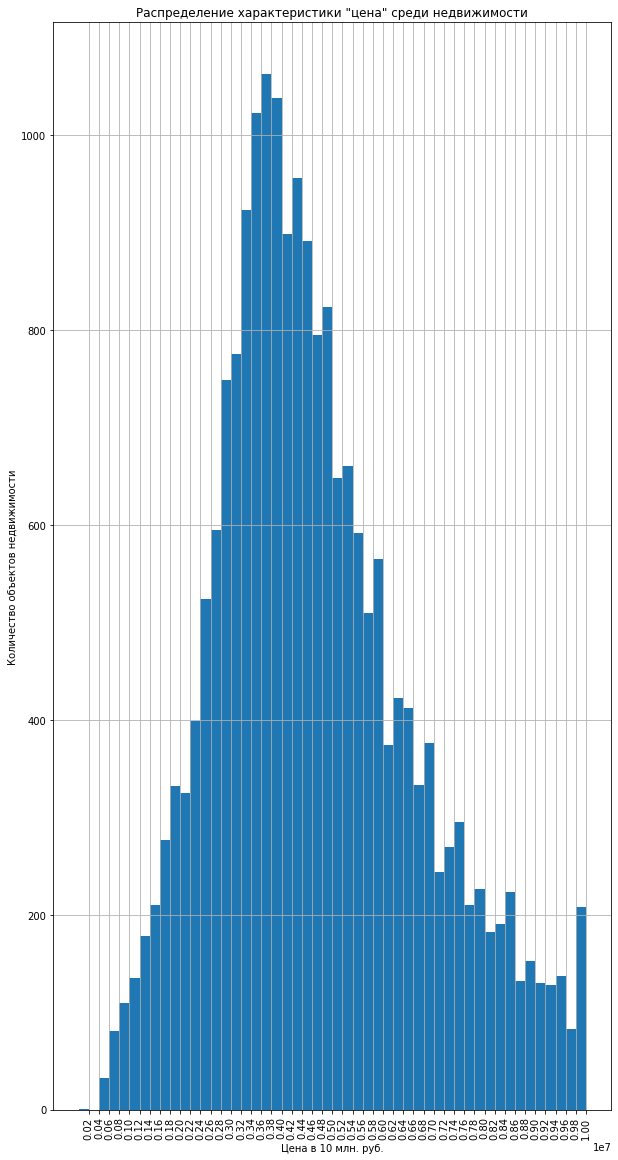

In [42]:
data = data.query("last_price <= 40000000")
data["last_price"].hist(bins=50, figsize=(10, 20), range=(0, 10000000))
plt.xticks([200000 * x for x in range(1, 51)])
plt.xticks(rotation=90)

plt.title('Распределение характеристики "цена" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Цена в 10 млн. руб.')
plt.show()

Видим, что значений, которые выходят за рамки 1 миллиона слишком мало, отбросим строки с ними


In [43]:
data = data.query("last_price >= 1000000")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23130 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23130 non-null  int64         
 1   last_price              23130 non-null  int64         
 2   total_area              23130 non-null  int64         
 3   first_day_exposition    23130 non-null  datetime64[ns]
 4   rooms                   23130 non-null  int64         
 5   ceiling_height          23130 non-null  float64       
 6   floors_total            23130 non-null  int64         
 7   living_area             23130 non-null  int64         
 8   floor                   23130 non-null  int64         
 9   is_apartment            23130 non-null  bool          
 10  studio                  23130 non-null  bool          
 11  open_plan               23130 non-null  bool          
 12  kitchen_area            23130 non-null  int64 

#### <a id='toc1_4_1_3_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `kitchen_area`](#toc0_)


Рассмотрим общую картину распределения площадей кухонь


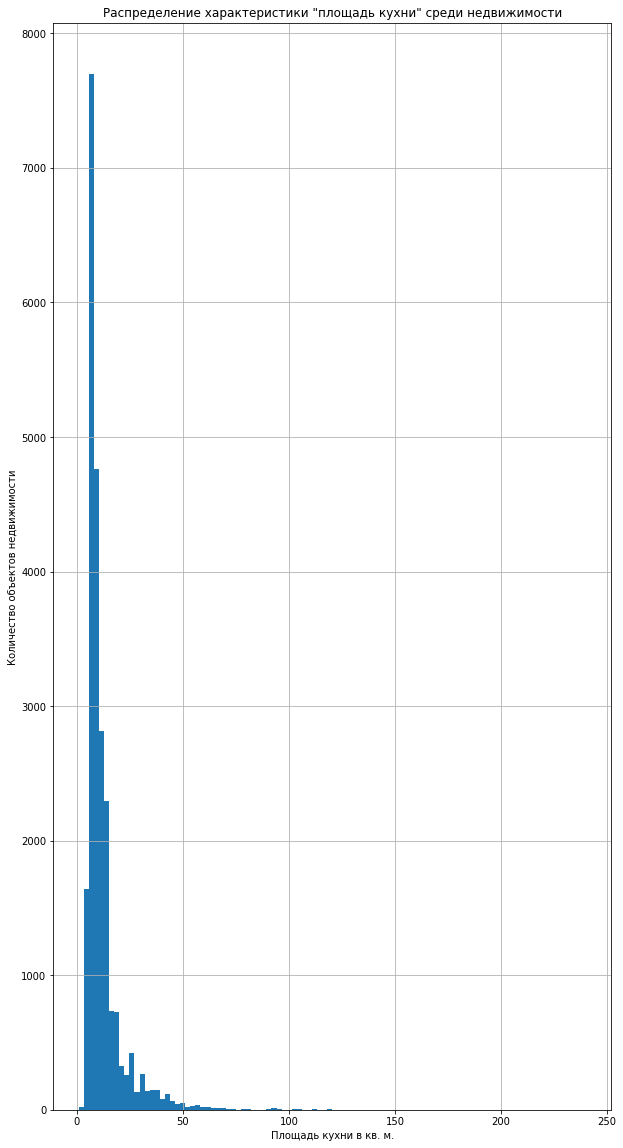

In [44]:
data["kitchen_area"].hist(bins=100, figsize=(10, 20))

plt.title('Распределение характеристики "площадь кухни" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Площадь кухни в кв. м.')
plt.show()

Видим, что есть редкие значения, которые выходят за рамки 60 метров. Отбросим строки с ними и взглянем на значения меньше 15 метров подробнее принт one two therr


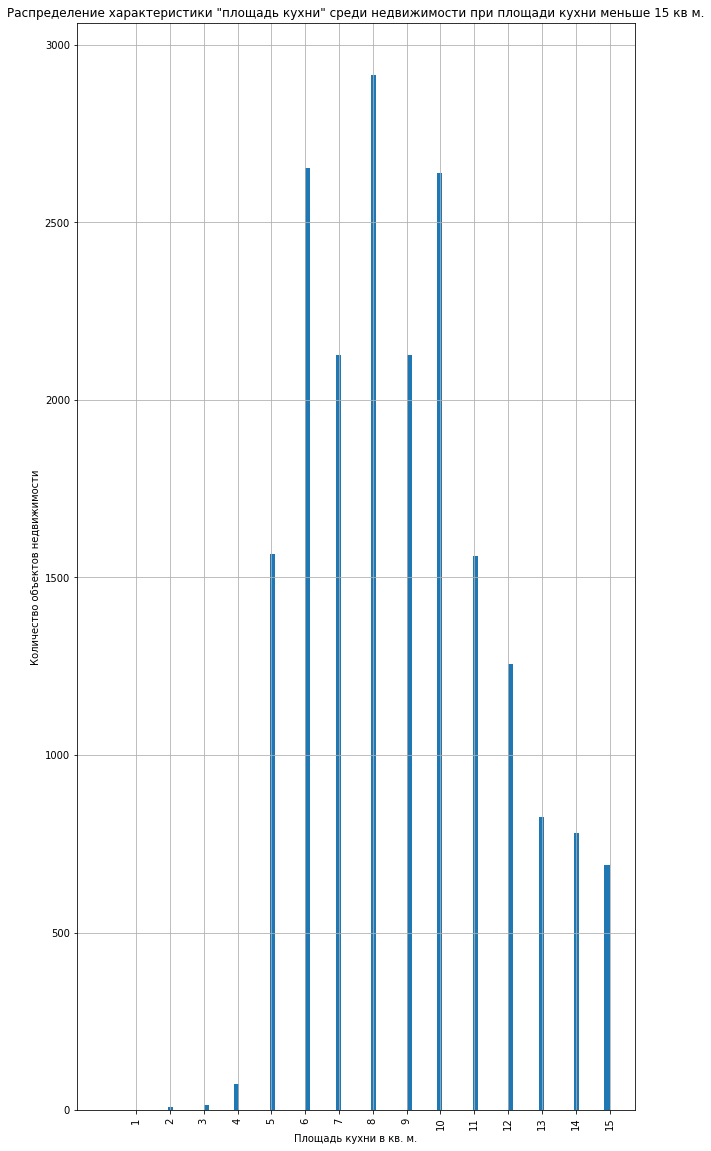

In [45]:
data = data.query("kitchen_area <= 60")
data["kitchen_area"].hist(bins=100, figsize=(10, 20), range=(0, 15))
plt.xticks([x for x in range(1, 16)])
plt.xticks(rotation=90)

plt.title('Распределение характеристики "площадь кухни" среди недвижимости при площади кухни меньше 15 кв м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Площадь кухни в кв. м.')
plt.show()

Площади кухонь меньше 4 квадратных метров встречаются редко, отбросим строки с ними


In [46]:
data = data.query("kitchen_area >= 4")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22966 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22966 non-null  int64         
 1   last_price              22966 non-null  int64         
 2   total_area              22966 non-null  int64         
 3   first_day_exposition    22966 non-null  datetime64[ns]
 4   rooms                   22966 non-null  int64         
 5   ceiling_height          22966 non-null  float64       
 6   floors_total            22966 non-null  int64         
 7   living_area             22966 non-null  int64         
 8   floor                   22966 non-null  int64         
 9   is_apartment            22966 non-null  bool          
 10  studio                  22966 non-null  bool          
 11  open_plan               22966 non-null  bool          
 12  kitchen_area            22966 non-null  int64 

#### <a id='toc1_4_1_4_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `living_area`](#toc0_)


Рассмотрим общую картину распределения площадей жилых помещений


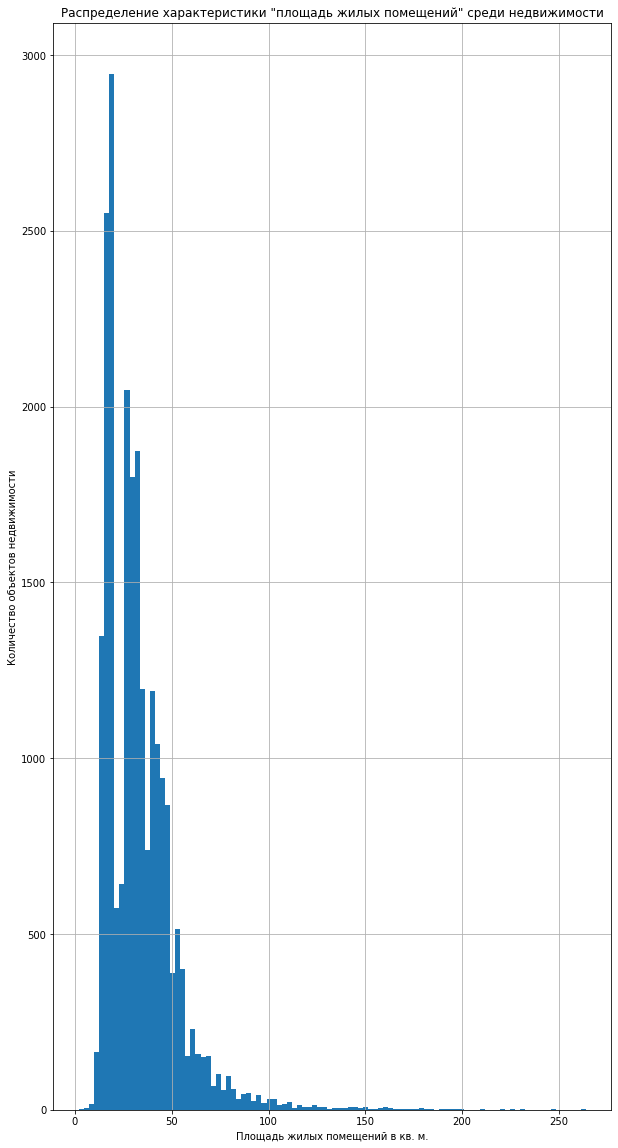

In [47]:
data["living_area"].hist(bins=100, figsize=(10, 20))

plt.title('Распределение характеристики "площадь жилых помещений" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Площадь жилых помещений в кв. м.')
plt.show()

Видим, что есть редкие значения, которые выходят за рамки 150 метров. Отбросим строки с ними и взглянем на значения меньше 20 метров подробнее


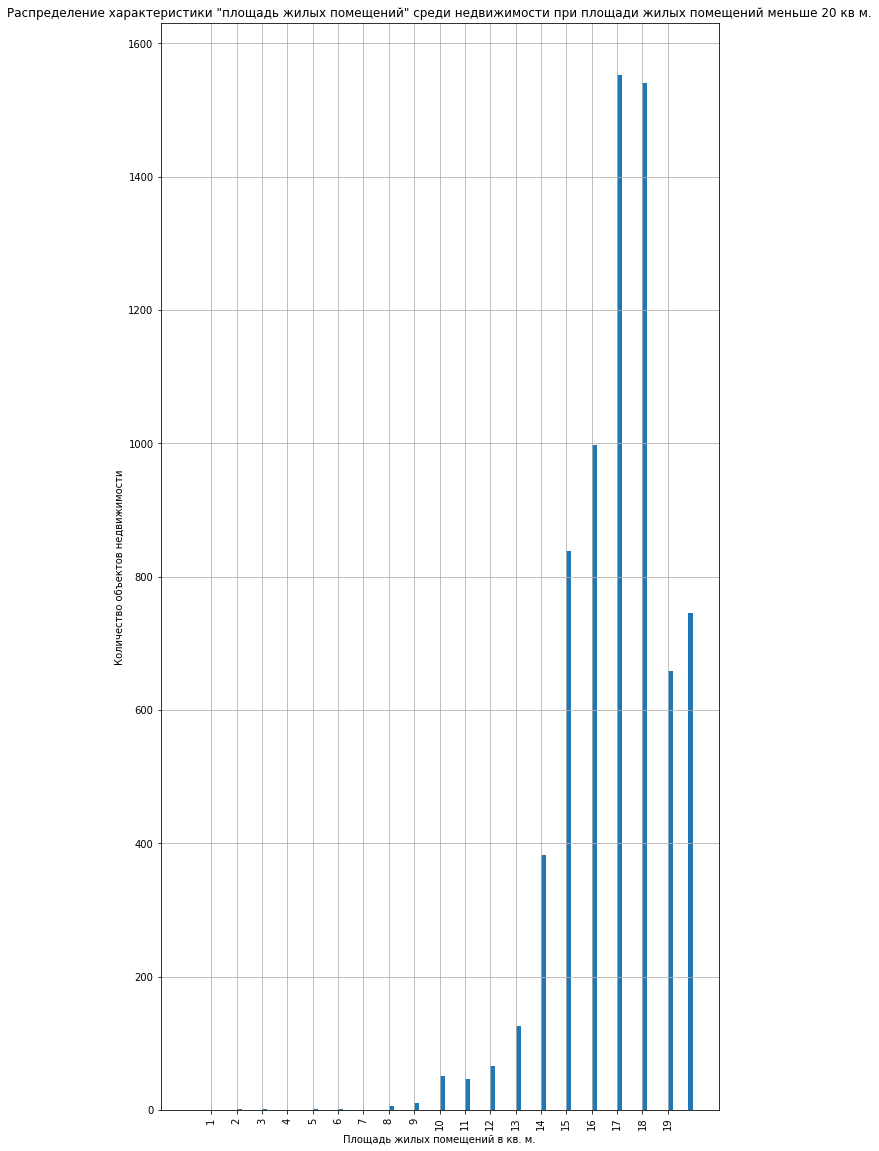

In [48]:
data = data.query("living_area <= 150")
data["living_area"].hist(bins=100, figsize=(10, 20), range=(0, 20))
plt.xticks([x for x in range(1, 20)])
plt.xticks(rotation=90)

plt.title(
    'Распределение характеристики "площадь жилых помещений" среди недвижимости при площади жилых помещений меньше 20 кв м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Площадь жилых помещений в кв. м.')
plt.show()

Площади жилых помещений меньше 14 квадратных метров встречаются редко, отбросим строки с ними


In [49]:
data = data.query("living_area >= 14")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22595 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22595 non-null  int64         
 1   last_price              22595 non-null  int64         
 2   total_area              22595 non-null  int64         
 3   first_day_exposition    22595 non-null  datetime64[ns]
 4   rooms                   22595 non-null  int64         
 5   ceiling_height          22595 non-null  float64       
 6   floors_total            22595 non-null  int64         
 7   living_area             22595 non-null  int64         
 8   floor                   22595 non-null  int64         
 9   is_apartment            22595 non-null  bool          
 10  studio                  22595 non-null  bool          
 11  open_plan               22595 non-null  bool          
 12  kitchen_area            22595 non-null  int64 

#### <a id='toc1_4_1_5_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `living_area`](#toc0_)


Рассмотрим общую картину высоты потолков


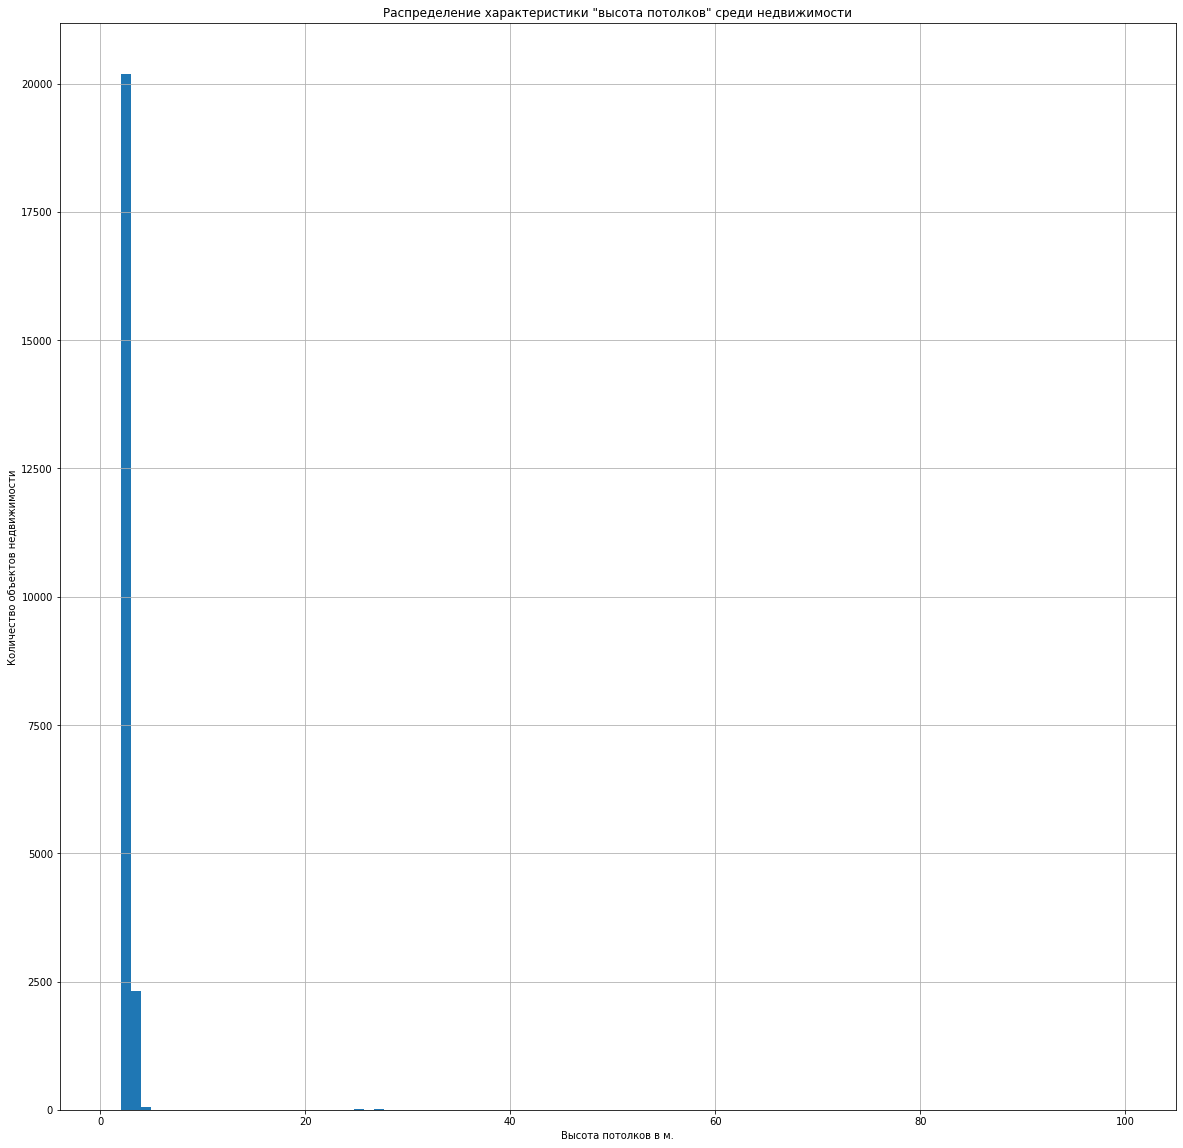

In [50]:
data["ceiling_height"].hist(bins=100, figsize=(20, 20))

plt.title('Распределение характеристики "высота потолков" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Высота потолков в м.')
plt.show()

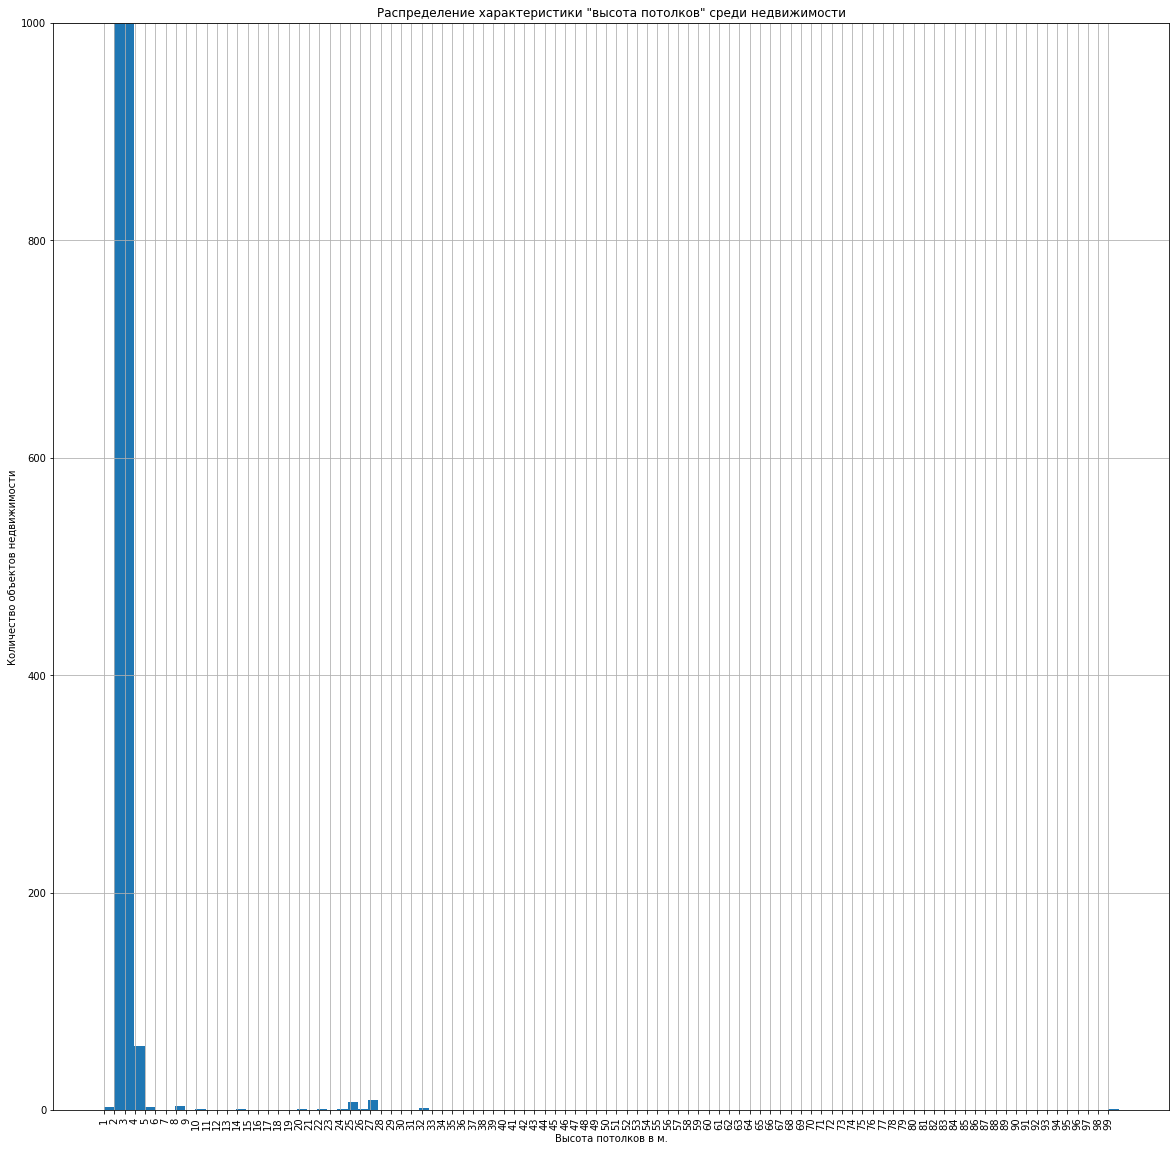

In [51]:
data["ceiling_height"].hist(bins=100, figsize=(20, 20))
plt.xticks([x for x in range(1, 100, 1)])
plt.xticks(rotation=90)
plt.ylim(0, 1000)

plt.title('Распределение характеристики "высота потолков" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Высота потолков в м.')
plt.show()

Видим значения выше 10 метров, что явно является выбросом. Вероятнее всего, был добавлен один лишний ноль, уберем его. Затем значения больше 5 метров отбросим. Потолки ниже 2-х метров слишком низкие


In [52]:
data["ceiling_height"] = data["ceiling_height"].apply(
    lambda x: x / 10 if pd.notna(x) and x > 10 else x
)
data = data.query(
    "(ceiling_height <= 5 or ceiling_height.isna()) and ceiling_height >= 2"
)

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22582 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22582 non-null  int64         
 1   last_price              22582 non-null  int64         
 2   total_area              22582 non-null  int64         
 3   first_day_exposition    22582 non-null  datetime64[ns]
 4   rooms                   22582 non-null  int64         
 5   ceiling_height          22582 non-null  float64       
 6   floors_total            22582 non-null  int64         
 7   living_area             22582 non-null  int64         
 8   floor                   22582 non-null  int64         
 9   is_apartment            22582 non-null  bool          
 10  studio                  22582 non-null  bool          
 11  open_plan               22582 non-null  bool          
 12  kitchen_area            22582 non-null  int64 

#### <a id='toc1_4_1_6_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `rooms`](#toc0_)


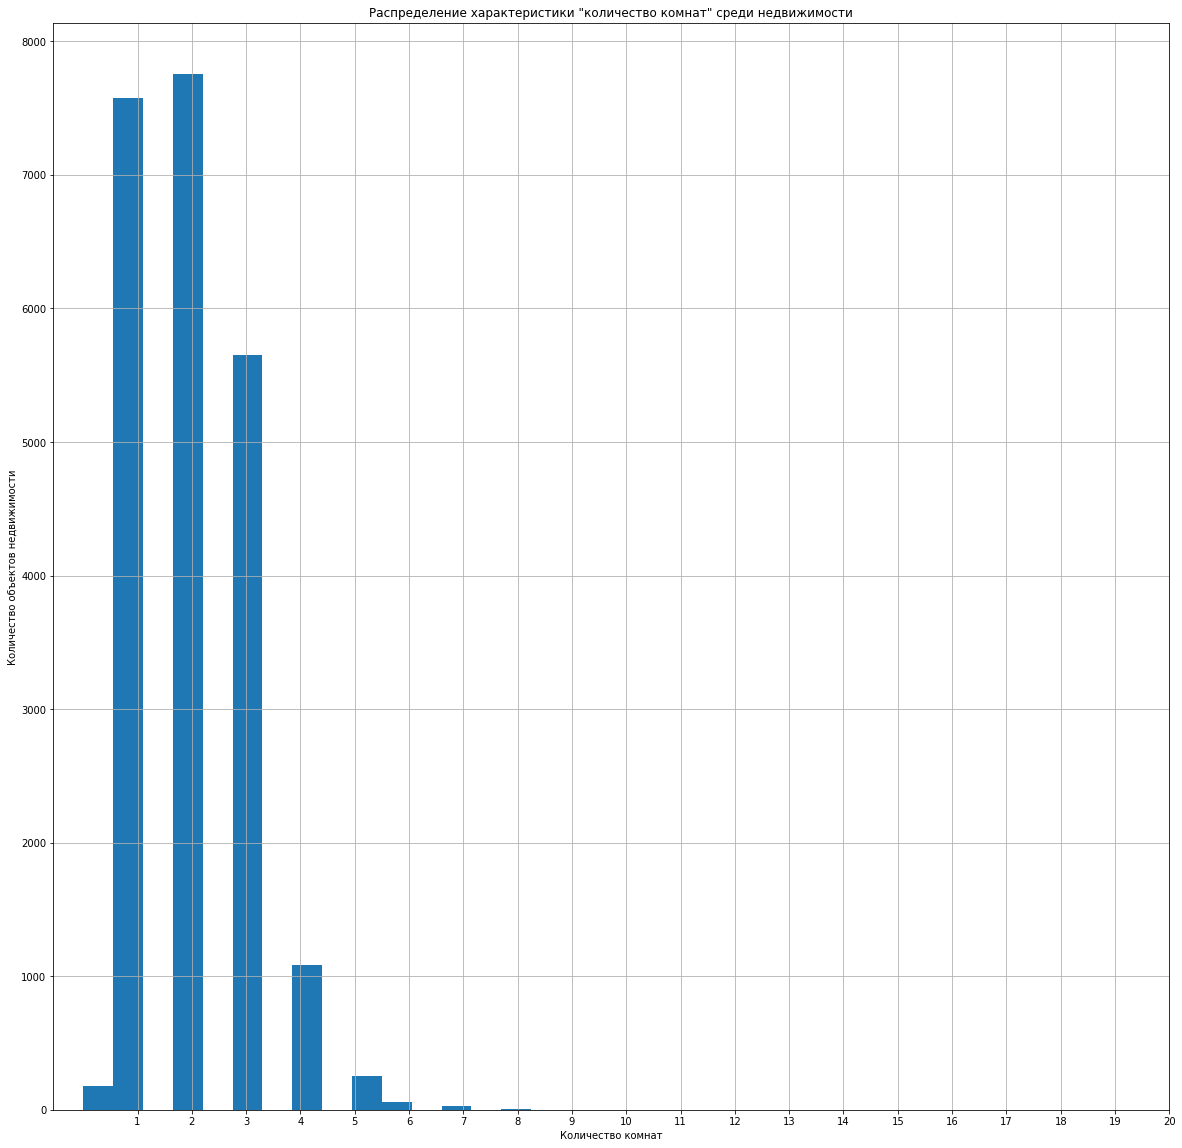

In [53]:
data["rooms"].hist(bins=20, figsize=(20, 20))
plt.xticks([x for x in range(1, 21)])

plt.title('Распределение характеристики "количество комнат" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Количество комнат')
plt.show()

Видим, что есть редкие значения, которые выходят за рамки 5 комнат. Отбросим строки с ними. Также уберем строки с 0 комнат, так как это явно ошибка


In [54]:
data = data.query("rooms <= 5 and rooms > 0")

#### <a id='toc1_4_1_7_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `floor_category`](#toc0_)


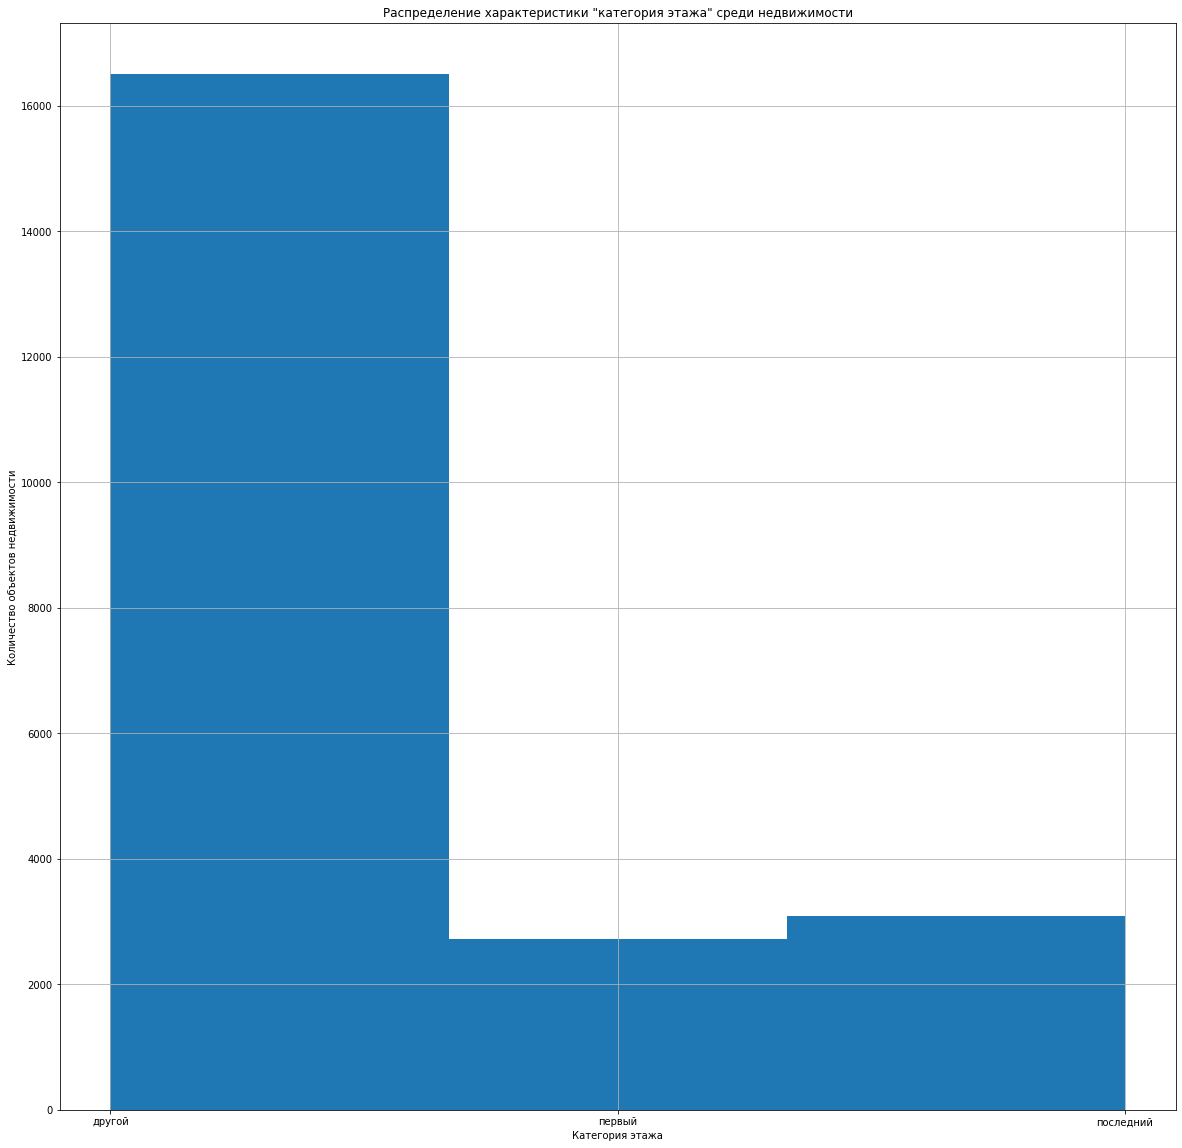

In [55]:
data["floor_category"].hist(bins=3, figsize=(20, 20))

plt.title('Распределение характеристики "категория этажа" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Категория этажа')
plt.show()

Аномалий в столбце `floor_category` не обнаружено


#### <a id='toc1_4_1_8_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `floors_total`](#toc0_)


Посмотрим распределение общего количества этажей в домах.


Text(0.5, 0, 'Количество этажей')

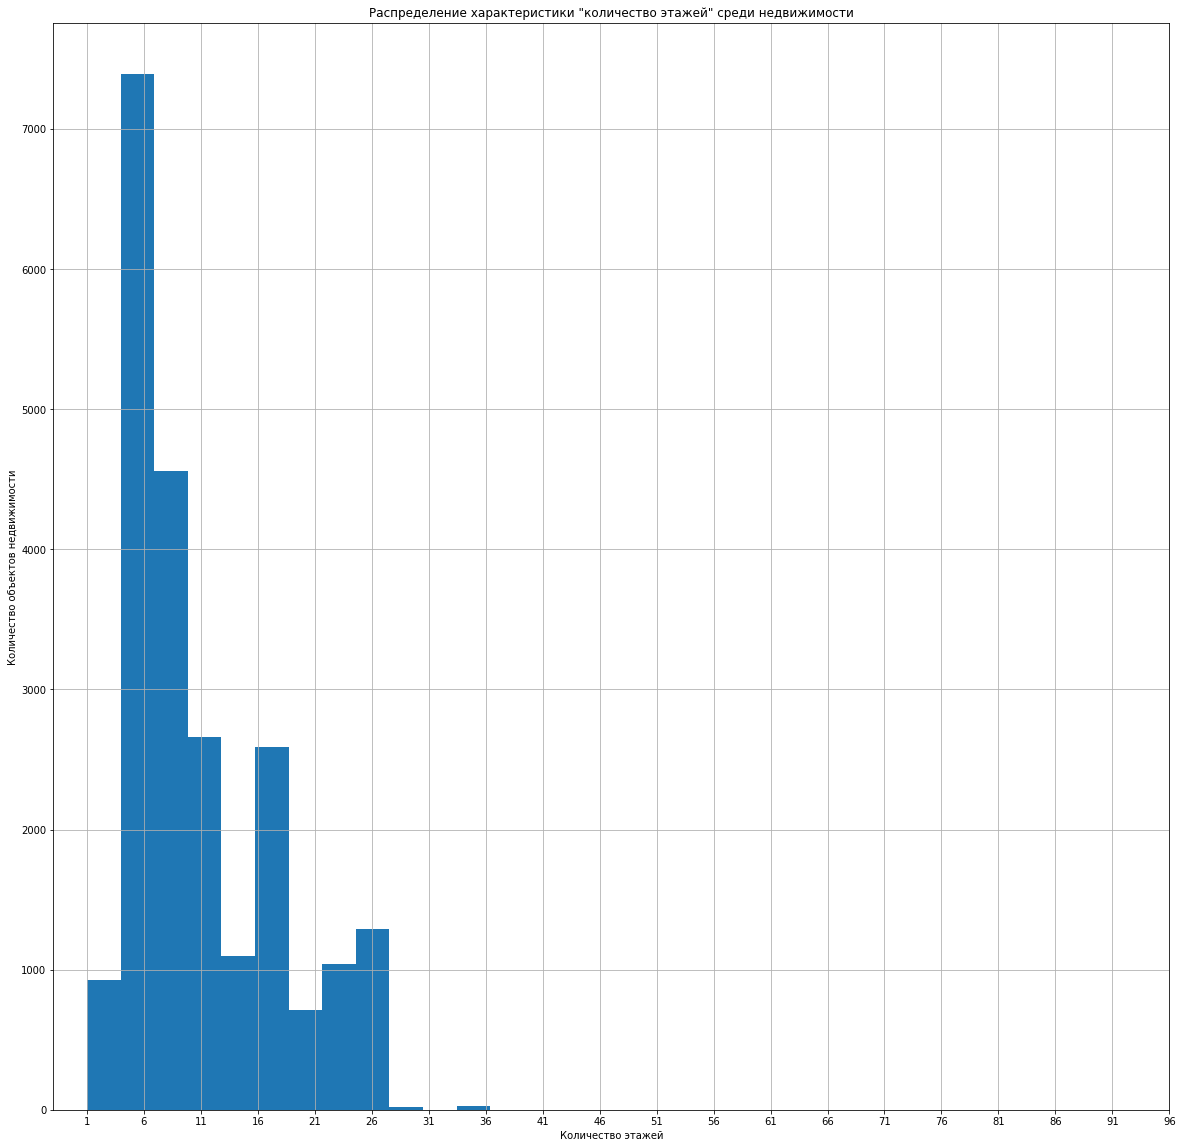

In [56]:
data["floors_total"].hist(bins=20, figsize=(20, 20))
plt.xticks([x for x in range(1, 100, 5)])

plt.title('Распределение характеристики "количество этажей" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Количество этажей')

Видим, что есть редкие значения, которые выходят за рамки 28 этажей. Отбросим строки с ними


In [57]:
data = data.query("floors_total <= 28")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22283 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22283 non-null  int64         
 1   last_price              22283 non-null  int64         
 2   total_area              22283 non-null  int64         
 3   first_day_exposition    22283 non-null  datetime64[ns]
 4   rooms                   22283 non-null  int64         
 5   ceiling_height          22283 non-null  float64       
 6   floors_total            22283 non-null  int64         
 7   living_area             22283 non-null  int64         
 8   floor                   22283 non-null  int64         
 9   is_apartment            22283 non-null  bool          
 10  studio                  22283 non-null  bool          
 11  open_plan               22283 non-null  bool          
 12  kitchen_area            22283 non-null  int64 

#### <a id='toc1_4_1_9_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `cityCenters_nearest`](#toc0_)


Взглянем на общую картину распределения расстояния до центра города


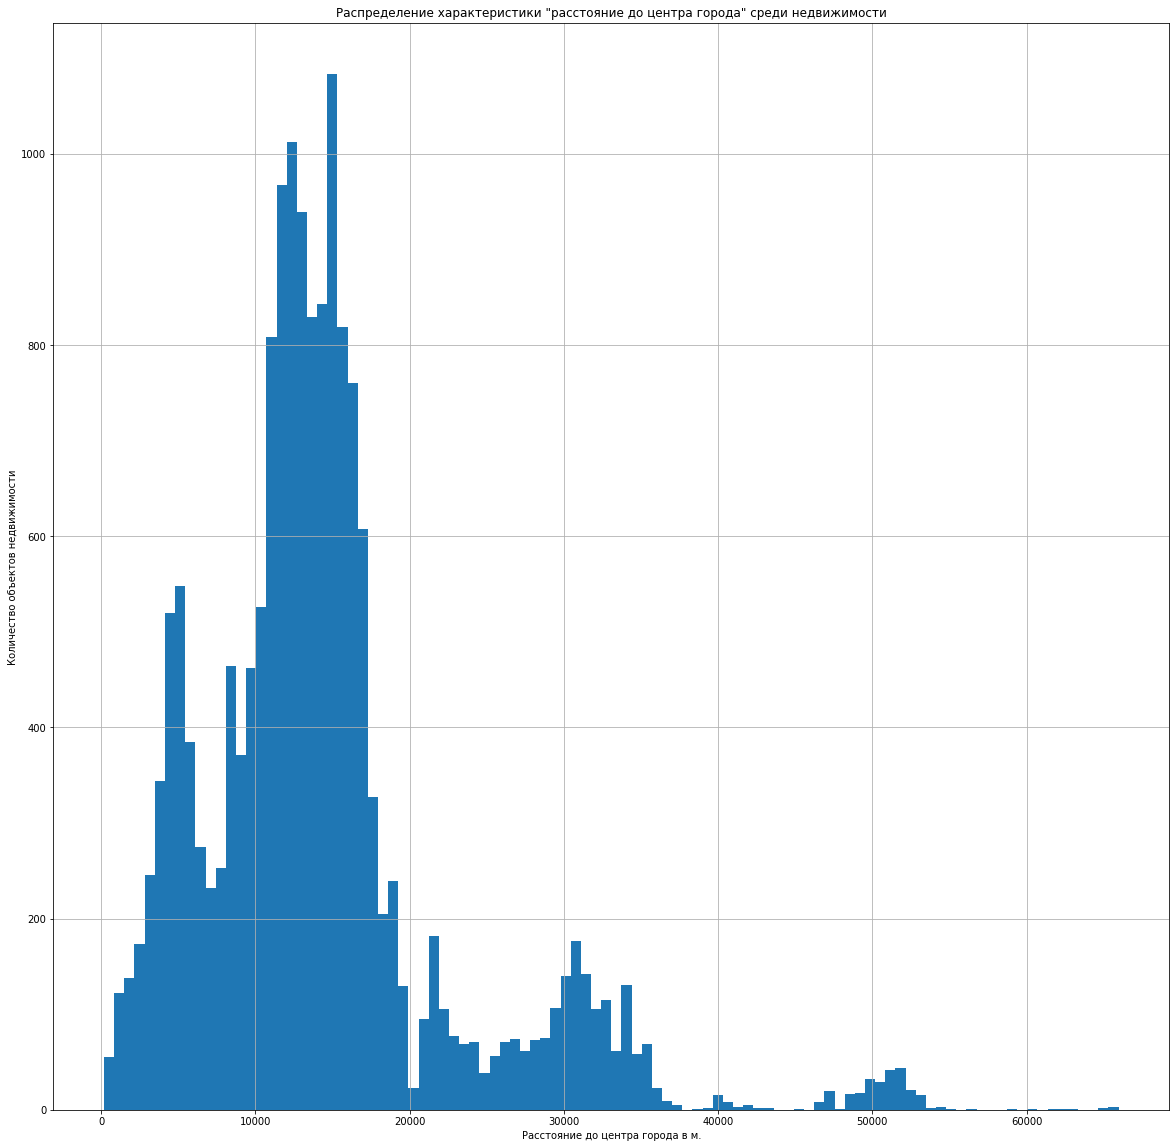

In [58]:
data["cityCenters_nearest"].hist(bins=100, figsize=(20, 20))

plt.title('Распределение характеристики "расстояние до центра города" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Расстояние до центра города в м.')
plt.show()

Заметно, что есть редкие значения, которые выходят за рамки 39 километров. Отбросим строки с ними, а также взглянем на значения меньше 5 километров подробнее


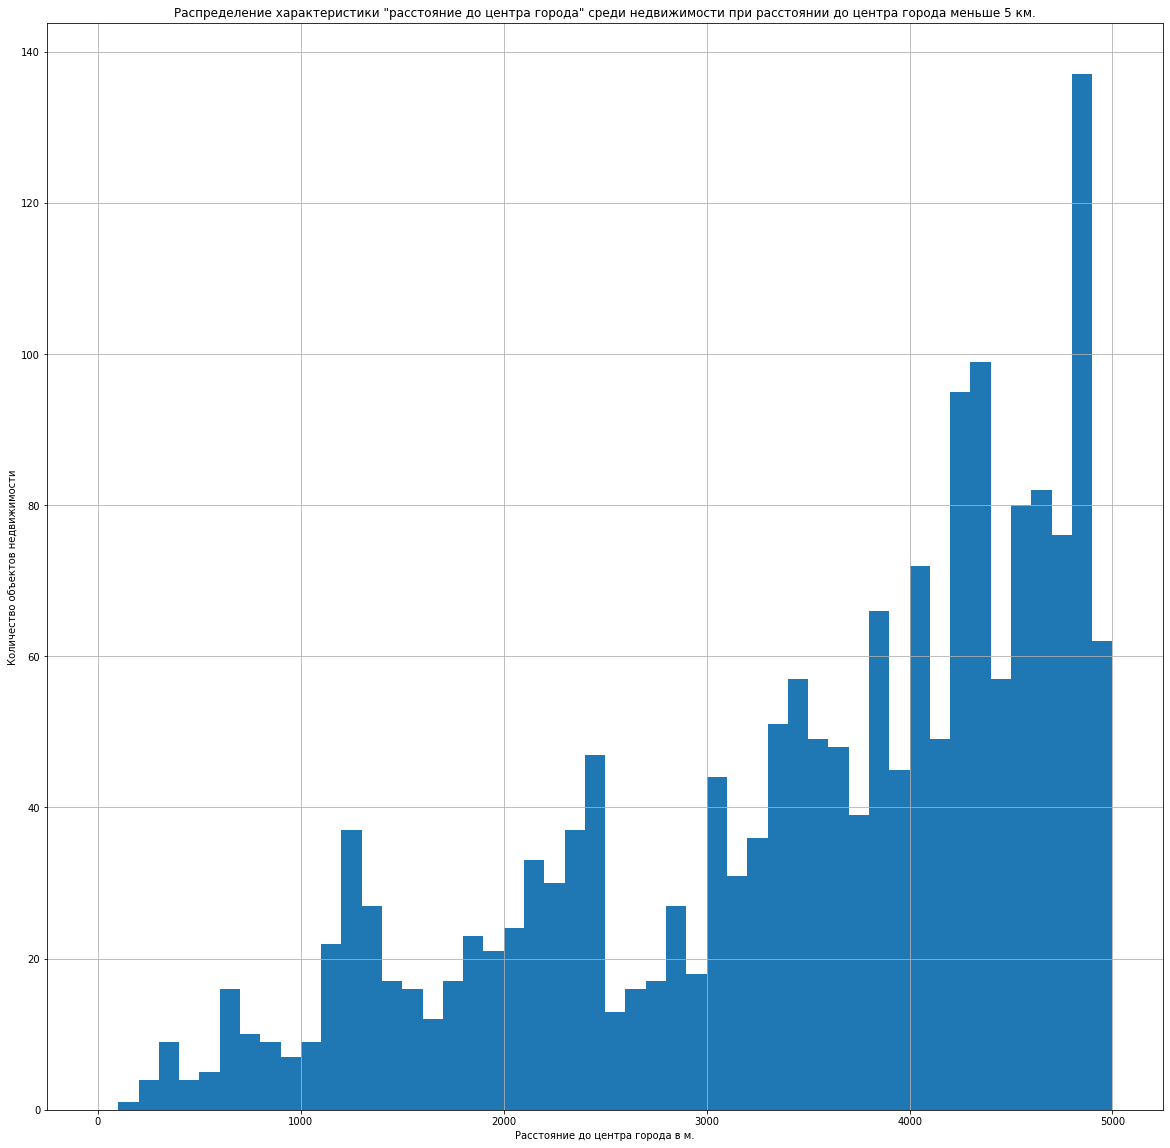

In [59]:
data = data.query("cityCenters_nearest <= 39000 or cityCenters_nearest.isna()")
data["cityCenters_nearest"].hist(bins=50, figsize=(20, 20), range=(0, 5000))

plt.title('Распределение характеристики "расстояние до центра города" среди недвижимости при расстоянии до центра города меньше 5 км.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Расстояние до центра города в м.')
plt.show()

Видим, что расстояние до центра города меньше 1 километра встречается редко, отбросим строки с ними


In [60]:
data = data.query("cityCenters_nearest >= 1000 or cityCenters_nearest.isna()")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21915 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21915 non-null  int64         
 1   last_price              21915 non-null  int64         
 2   total_area              21915 non-null  int64         
 3   first_day_exposition    21915 non-null  datetime64[ns]
 4   rooms                   21915 non-null  int64         
 5   ceiling_height          21915 non-null  float64       
 6   floors_total            21915 non-null  int64         
 7   living_area             21915 non-null  int64         
 8   floor                   21915 non-null  int64         
 9   is_apartment            21915 non-null  bool          
 10  studio                  21915 non-null  bool          
 11  open_plan               21915 non-null  bool          
 12  kitchen_area            21915 non-null  int64 

#### <a id='toc1_4_1_10_'></a>[Исследование данных на аномалии, отбрасывание редких значений в столбце `parks_nearest`](#toc0_)

Взглянем на общую картину распределения расстояния до ближайшего парка


Text(0.5, 0, 'Расстояние до ближайшего парка в м.')

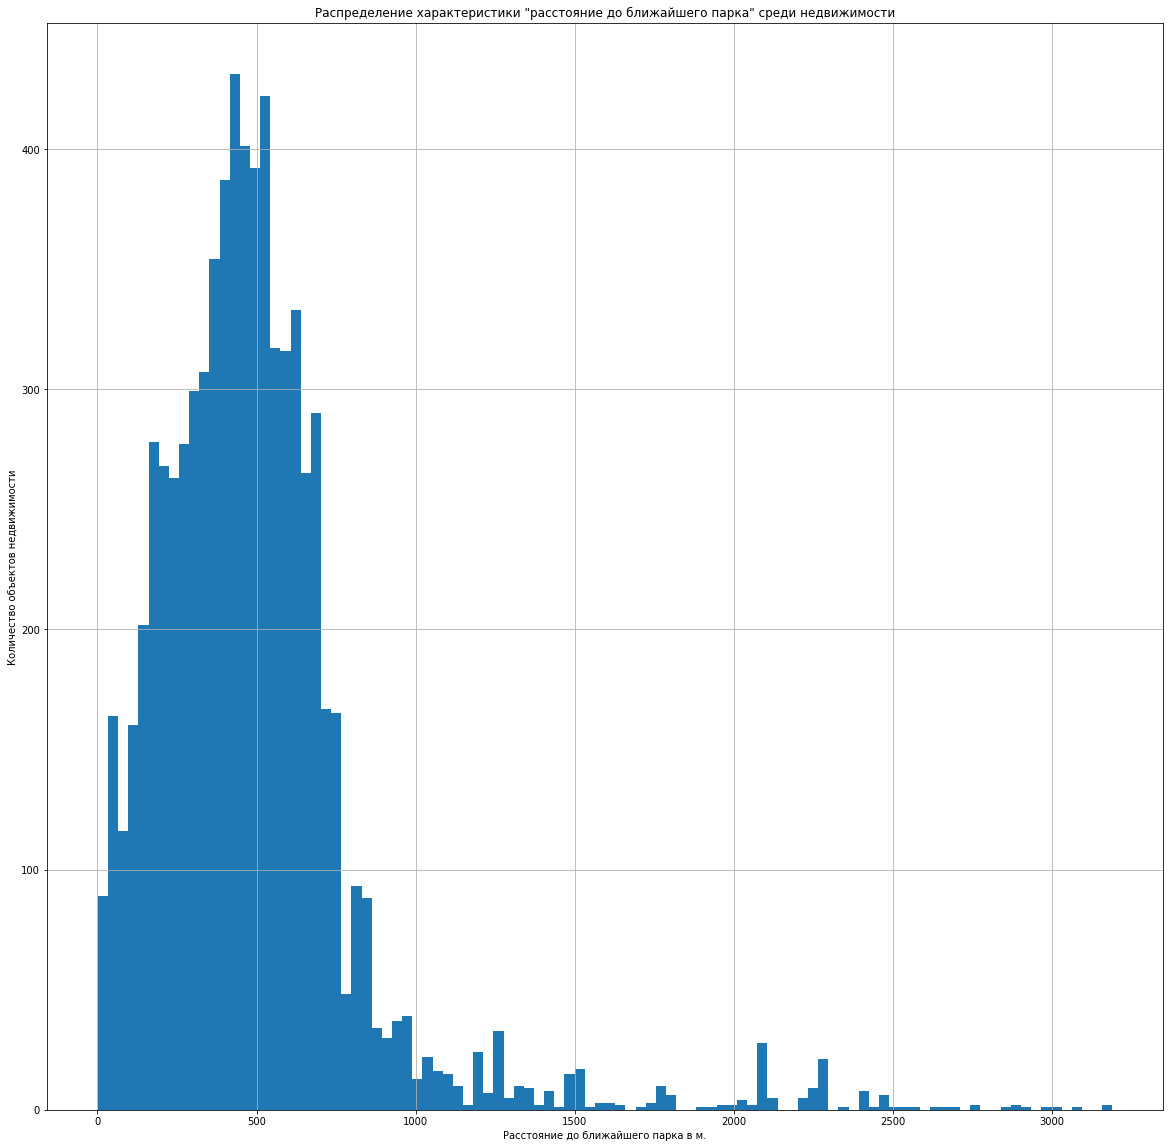

In [61]:
data["parks_nearest"].hist(bins=100, figsize=(20, 20))

plt.title('Распределение характеристики "расстояние до ближайшего парка" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Расстояние до ближайшего парка в м.')

Рассстояние до ближайшего парка больше 1 километра встречается редко, отбросим строки с ними и взглянем на значения меньше 200 метров подробнее


Text(0.5, 0, 'Расстояние до ближайшего парка в м.')

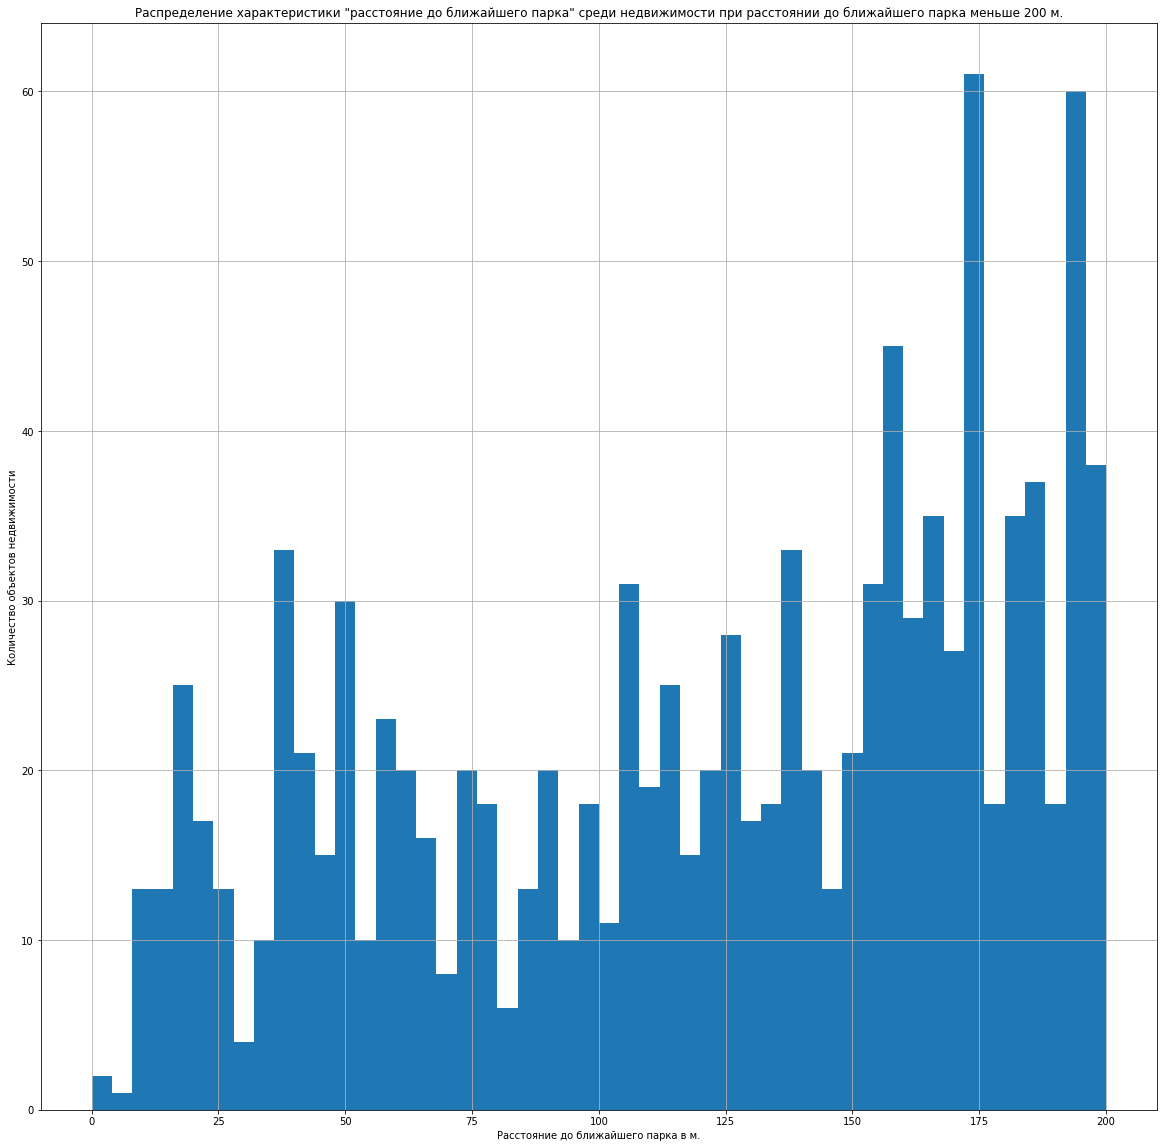

In [62]:
data = data.query("parks_nearest <= 1000 or parks_nearest.isna()")
data["parks_nearest"].hist(bins=50, figsize=(20, 20), range=(0, 200))

plt.title('Распределение характеристики "расстояние до ближайшего парка" среди недвижимости при расстоянии до ближайшего парка меньше 200 м.')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Расстояние до ближайшего парка в м.')

In [63]:
# Проверка целости данных

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21567 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21567 non-null  int64         
 1   last_price              21567 non-null  int64         
 2   total_area              21567 non-null  int64         
 3   first_day_exposition    21567 non-null  datetime64[ns]
 4   rooms                   21567 non-null  int64         
 5   ceiling_height          21567 non-null  float64       
 6   floors_total            21567 non-null  int64         
 7   living_area             21567 non-null  int64         
 8   floor                   21567 non-null  int64         
 9   is_apartment            21567 non-null  bool          
 10  studio                  21567 non-null  bool          
 11  open_plan               21567 non-null  bool          
 12  kitchen_area            21567 non-null  int64 

Даже на расстояних менее 200 метров много парков, не будем отбрасывать их


#### <a id='toc1_4_1_11_'></a>[Вывод исследования данных на аномалии](#toc0_)


Были найдены аномалии или редкие значения в столбцах `total_area`, `last_price`, `kitchen_area`, `living_area`, `ceiling_height`, `rooms`, `floors_total`, `cityCenters_nearest`, `parks_nearest`. Они были отброшены.
Редкие и аномальные значения мы отбрасываем для того, чтобы данные были более качественными для исследования самых частых случаев. Аномальные значения могут внести сильные искажения, например, в множестве {1, 2, 2, 2, 2, 2, 2, 100} из-за 100 среднее будет 14.5, что не показывает самое частое значение так как в множестве преобладают двойки.


### <a id='toc1_4_2_'></a>[Выявление наиболее частых значений каждой из характеристик](#toc0_)

('living_area', 'kitchen_area', 'last_price', 'total_area', 'ceiling_height', 'cityCenters_nearest', 'parks_nearest', 'rooms', 'floors_total','floor_category')


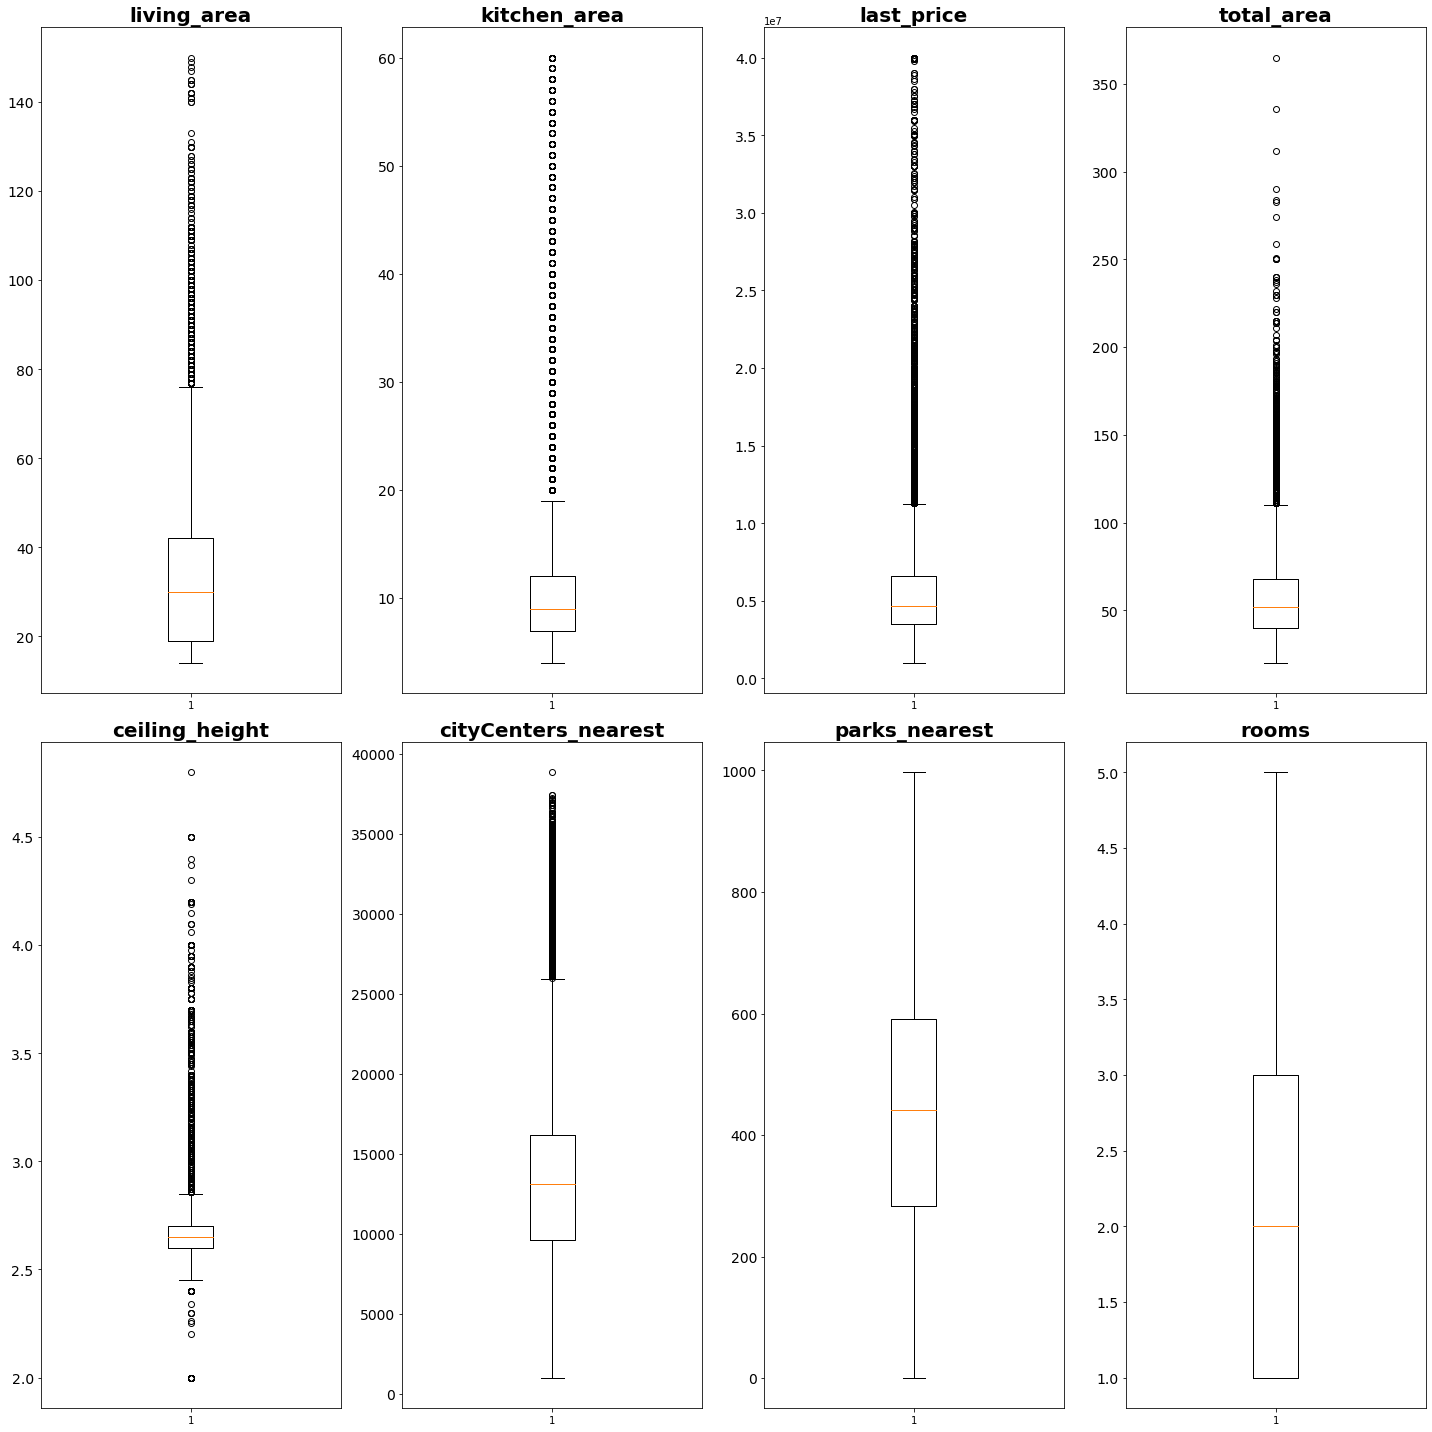

In [64]:
frequently_characheteristic_data = data.loc[
                                   :,
                                   [
                                       "living_area",
                                       "kitchen_area",
                                       "last_price",
                                       "total_area",
                                       "ceiling_height",
                                       "cityCenters_nearest",
                                       "parks_nearest",
                                       "rooms",
                                       "floors_total",
                                       "floor_category",
                                   ],
                                   ]
fig, axs = plt.subplots(
    2, (len(frequently_characheteristic_data.columns) // 3) + 1, figsize=(20, 20)
)

for i, ax in enumerate(axs.flat):
    ax.boxplot(
        frequently_characheteristic_data.iloc[:, i].dropna(),
    )
    ax.set_title(
        frequently_characheteristic_data.columns[i], fontsize=20, fontweight="bold"
    )
    ax.tick_params(axis="y", labelsize=14)

plt.tight_layout()

#### <a id='toc1_4_2_1_'></a>[Вывод раздела "Выявление наиболее частых значений каждой из характеристик"](#toc0_)


- `living_area` - наиболее частое значение 32 квадратных метра, чаще всего лежит в диапазоне от 20 до 45 квадратных метров
- `kitchen_area` - наиболее частое значение 10 квадратных метров, чаще всего лежит в диапазоне от 7 до 13 квадратных метров
- `last_price` - наиболее частое значение 6 миллионов, чаще всего лежит в диапазоне от 4.9 до 8 миллионов
- `total_area` - наиболее частое значение 57 квадратных метров, чаще всего лежит в диапазоне от 47 до 75 квадратных метров
- `ceiling_height` - наиболее частое значение 2.7 метра, чаще всего лежит в диапазоне от 2.6 до 3 метров
- `cityCenters_nearest` - наиболее частое значение 12 километров, чаще всего лежит в диапазоне от 6 до 14 километров
- `parks_nearest` - наиболее частое значение 440 метров, чаще всего лежит в диапазоне от 290 до 595 метров
- `rooms` - наиболее частое значение 2 комнаты, чаще всего лежит в диапазоне от 1 до 3 комнат


### <a id='toc1_4_3_'></a>[Исследование скорости продажи недвижимости](#toc0_)


Построим график расределения скорости продажи недвижимости


Text(0.5, 0, 'Количество дней продажи')

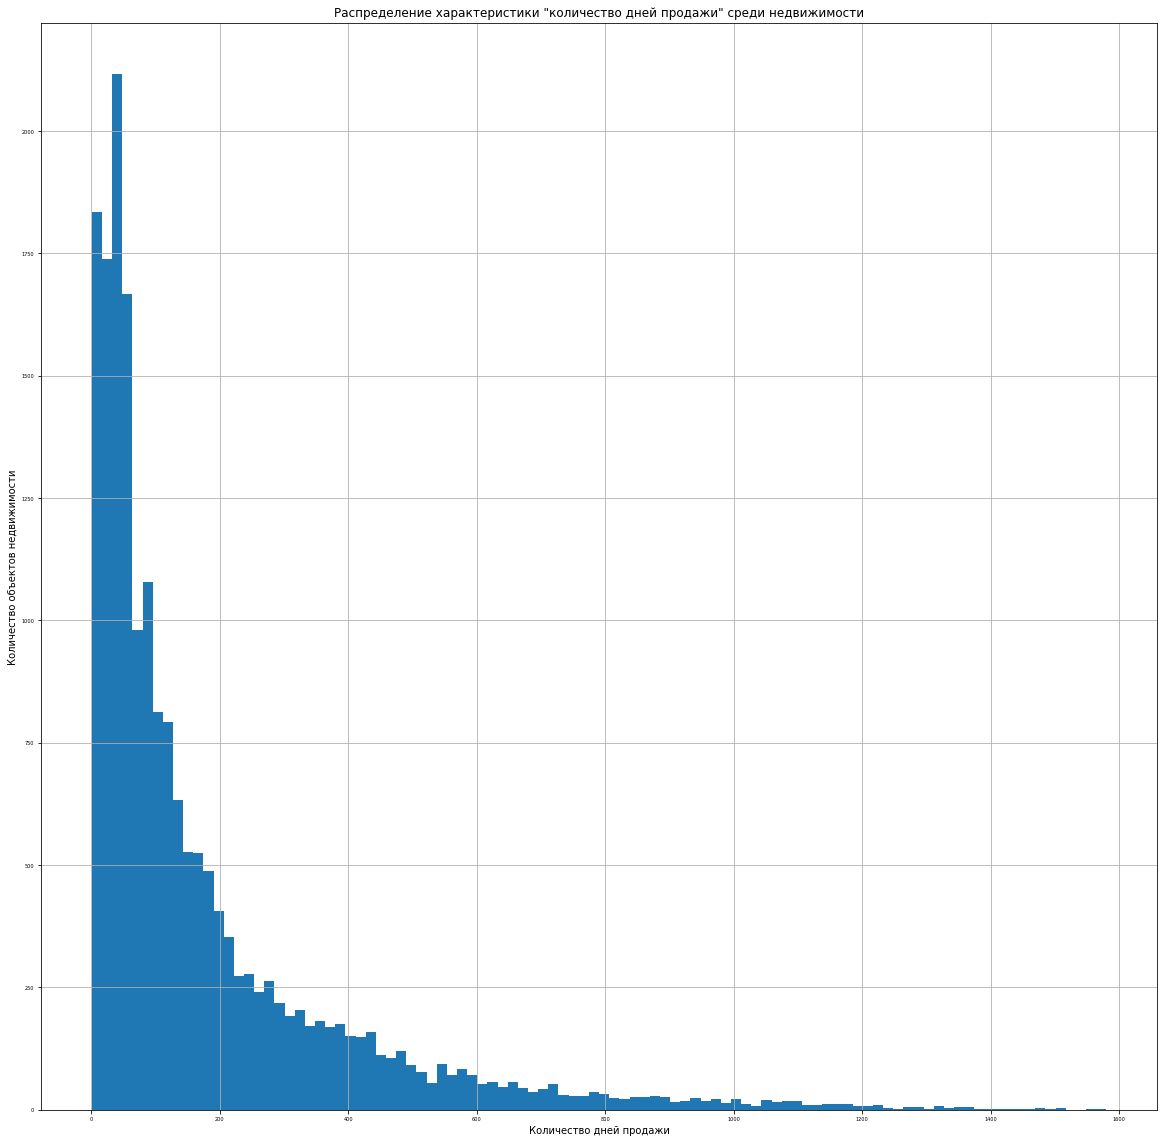

In [65]:
data["days_exposition"].hist(bins=100, figsize=(20, 20))
plt.gca().tick_params(axis="both", which="major", labelsize=5)
# Изменение частоты штрихов([x for x in range(0, 2001, 20)])

plt.title('Распределение характеристики "количество дней продажи" среди недвижимости')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Количество дней продажи')

Видим, что есть редкие значения, которые выходят за рамки 1200 дней. Отбросим строки с ними.


In [66]:
data = data.query("days_exposition <= 1200 or days_exposition.isna()")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21490 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21490 non-null  int64         
 1   last_price              21490 non-null  int64         
 2   total_area              21490 non-null  int64         
 3   first_day_exposition    21490 non-null  datetime64[ns]
 4   rooms                   21490 non-null  int64         
 5   ceiling_height          21490 non-null  float64       
 6   floors_total            21490 non-null  int64         
 7   living_area             21490 non-null  int64         
 8   floor                   21490 non-null  int64         
 9   is_apartment            21490 non-null  bool          
 10  studio                  21490 non-null  bool          
 11  open_plan               21490 non-null  bool          
 12  kitchen_area            21490 non-null  int64 

Взглянем на быстрые продажи недвижимости подробнее (до 20 дней)


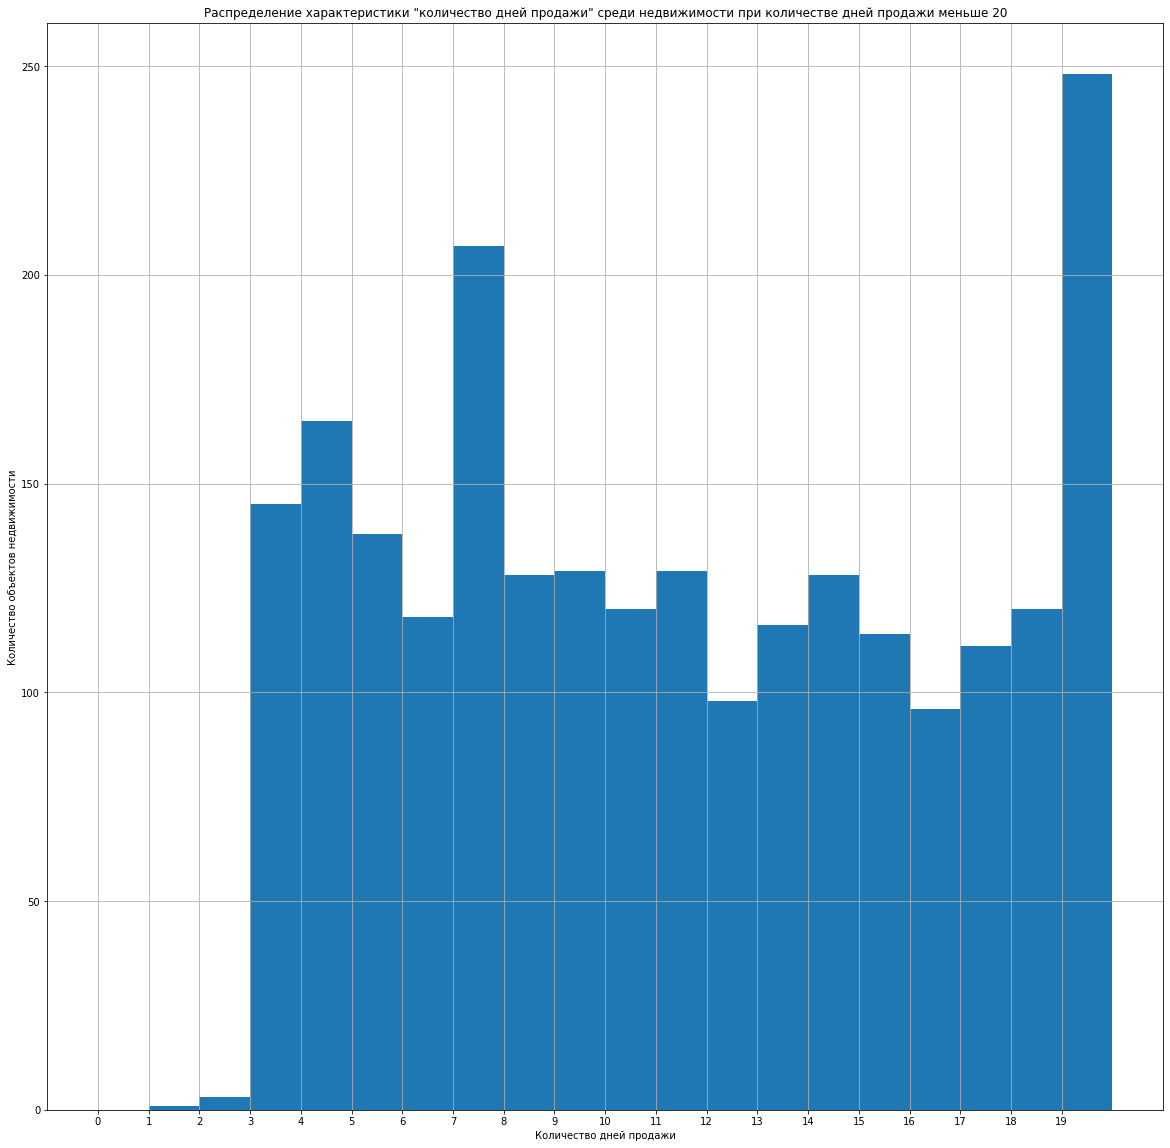

In [67]:
data["days_exposition"].hist(bins=20, figsize=(20, 20), range=(0, 20))
# Изменение частоты штрихов
plt.xticks([x for x in range(0, 20, 1)])

plt.title('Распределение характеристики "количество дней продажи" среди недвижимости при количестве дней продажи меньше 20')
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Количество дней продажи')
plt.show()

Видим, что продажи недвижимости менее чем за 3 дня встречаются редко, отбросим строки с ними


In [68]:
data = data.query("days_exposition >= 3 or days_exposition.isna()")

# Проверка целости данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21486 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21486 non-null  int64         
 1   last_price              21486 non-null  int64         
 2   total_area              21486 non-null  int64         
 3   first_day_exposition    21486 non-null  datetime64[ns]
 4   rooms                   21486 non-null  int64         
 5   ceiling_height          21486 non-null  float64       
 6   floors_total            21486 non-null  int64         
 7   living_area             21486 non-null  int64         
 8   floor                   21486 non-null  int64         
 9   is_apartment            21486 non-null  bool          
 10  studio                  21486 non-null  bool          
 11  open_plan               21486 non-null  bool          
 12  kitchen_area            21486 non-null  int64 

Посчитаем средний и медианный дни продажи недвижимости


In [69]:
print("Средний срок продажи квартиры:", data["days_exposition"].mean())
print("Медианный срок продажи квартиры:", data["days_exposition"].median())

Средний срок продажи квартиры: 174.10818352562382
Медианный срок продажи квартиры: 94.0


Построим boxplot для дней продажи недвижимости


([<matplotlib.axis.YTick at 0x7f3c0f158c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

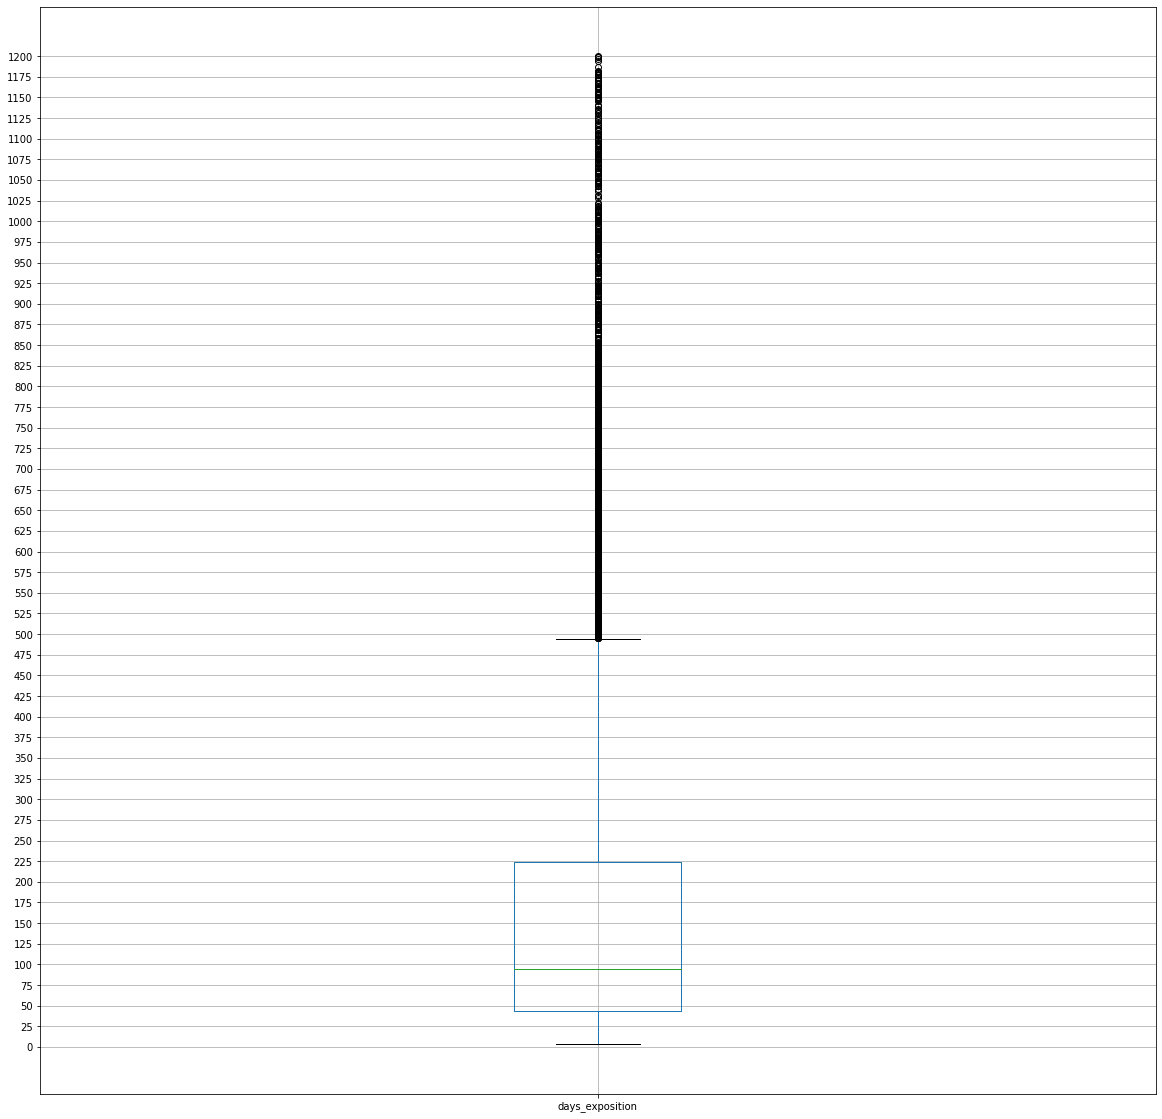

In [70]:
data.boxplot(column="days_exposition", figsize=(20, 20))

plt.yticks([x for x in range(0, 1201, 25)])

#### <a id='toc1_4_3_1_'></a>[Вывод раздела "Исследование скорости продажи недвижимости"](#toc0_)


Обычно продажа квартиры занимает 45 - 225 дней, все что быстрее или медленее слишком медленные или слишком быстрые продажи. Медианное время продажи - 95 дней. Средний срок продажи квартиры - 175 дней.


### <a id='toc1_4_4_'></a>[Определение факторов, влияющих на стоимость квартиры](#toc0_)


Будет проанализировано влияние следующих факторов на стоимость квартиры:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


Для начала присвоим каждой из категорий этажа свой уникальный номер. Первый этаж - 1, другой - 2, последний - 3.


In [71]:
def return_floor_category_number(row):
    if row["floor_category"] == "первый":
        return 1
    if row["floor_category"] == "последний":
        return 3
    return 2


data["floor_category_number"] = data.apply(return_floor_category_number, axis=1)

Посчитаем корреляцию для нелинейных типов данных, для линейных типов данных (количество комнат, категория этажа, год, месяц, день публикации) применим другие методы.

In [72]:
contribution_linear_characteristic_data = data.loc[
                                   :,
                                   [
                                       "last_price",
                                       "total_area",
                                       "living_area",
                                       "kitchen_area",
                                   ],
                                   ]

char_contribution_table = contribution_linear_characteristic_data.corr().loc["last_price"]

print("Построим графики взаимосвязи цены и обозреваемых нелинейных характеристик (Площади).")

char_contribution_table.iloc[1:].sort_values(ascending=False)

Построим графики взаимосвязи цены и обозреваемых нелинейных характеристик (Площади).


total_area      0.771869
living_area     0.666569
kitchen_area    0.366270
Name: last_price, dtype: float64

Построим графики взаимосвязи цены и обозреваемых нелинейных характеристик (Площади).


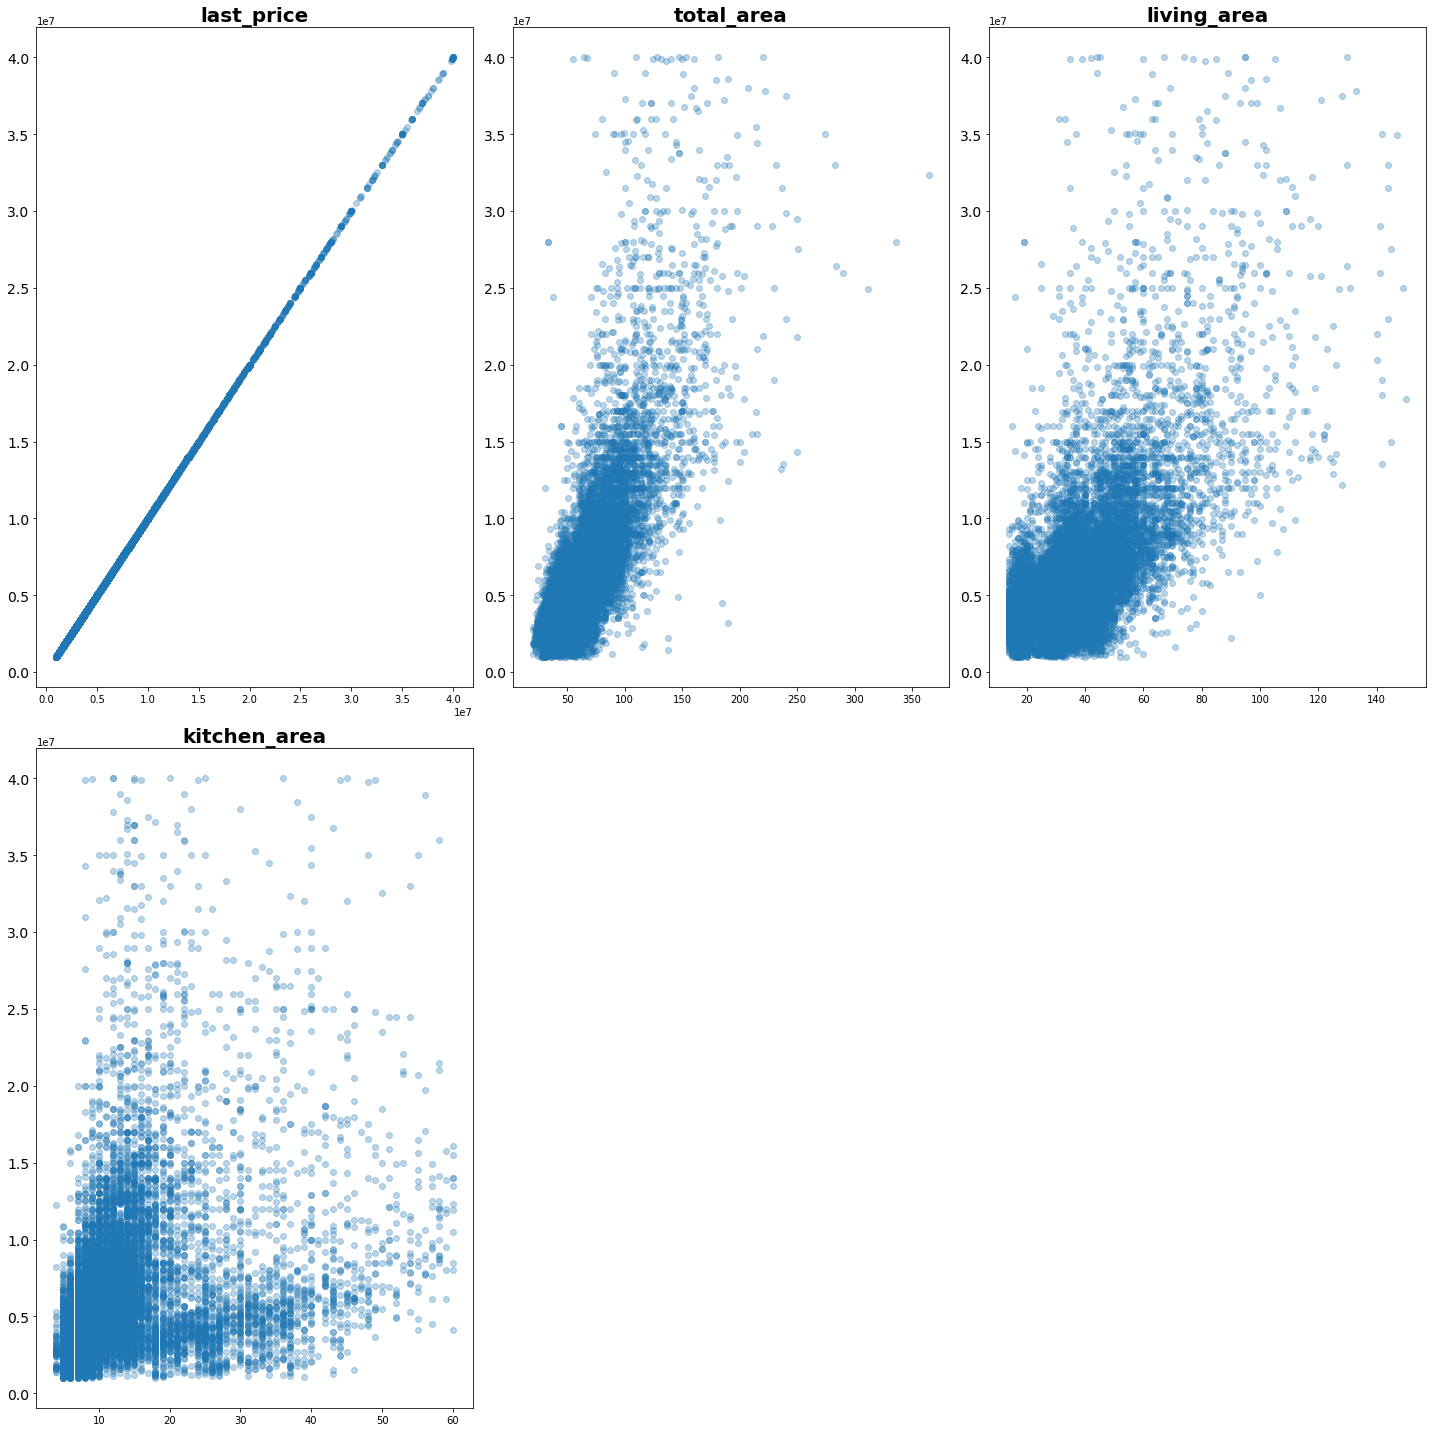

In [73]:
number_of_columns = 3
number_of_rows = len(contribution_linear_characteristic_data.columns) // number_of_columns
if len(contribution_linear_characteristic_data.columns) % number_of_columns:
    number_of_rows += 1  # Add an extra row if there are remaining columns

fig, axs = plt.subplots(number_of_rows, number_of_columns, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    # Check if the index is within the range of columns
    if i < len(contribution_linear_characteristic_data.columns):
        ax.scatter(
            y=contribution_linear_characteristic_data["last_price"],
            x=contribution_linear_characteristic_data.iloc[:, i],
            alpha=0.3,
        )
        ax.set_title(
            contribution_linear_characteristic_data.columns[i], fontsize=20, fontweight="bold"
        )
        ax.tick_params(axis="y", labelsize=14)
    else:
        ax.set_visible(False)  # Hide the subplot if it's not needed

plt.tight_layout()
plt.show()

Добавим столбец номер месяца без учета года, это позволит нам сравнивать динамику цен в зависимости от месяца в среднем во все года

In [74]:
data['publication_month_number'] = data['first_day_exposition'].dt.month

# Проверка
print(sorted(data['publication_month_number'].unique()))
data['publication_month_number'].head(5)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


0     3
1    12
2     8
4     6
5     9
Name: publication_month_number, dtype: int64

Построим графики взаимосвязи цены и обозреваемых линейных характеристик (Количество комнат, категория этажа, год, месяц, день публикации).

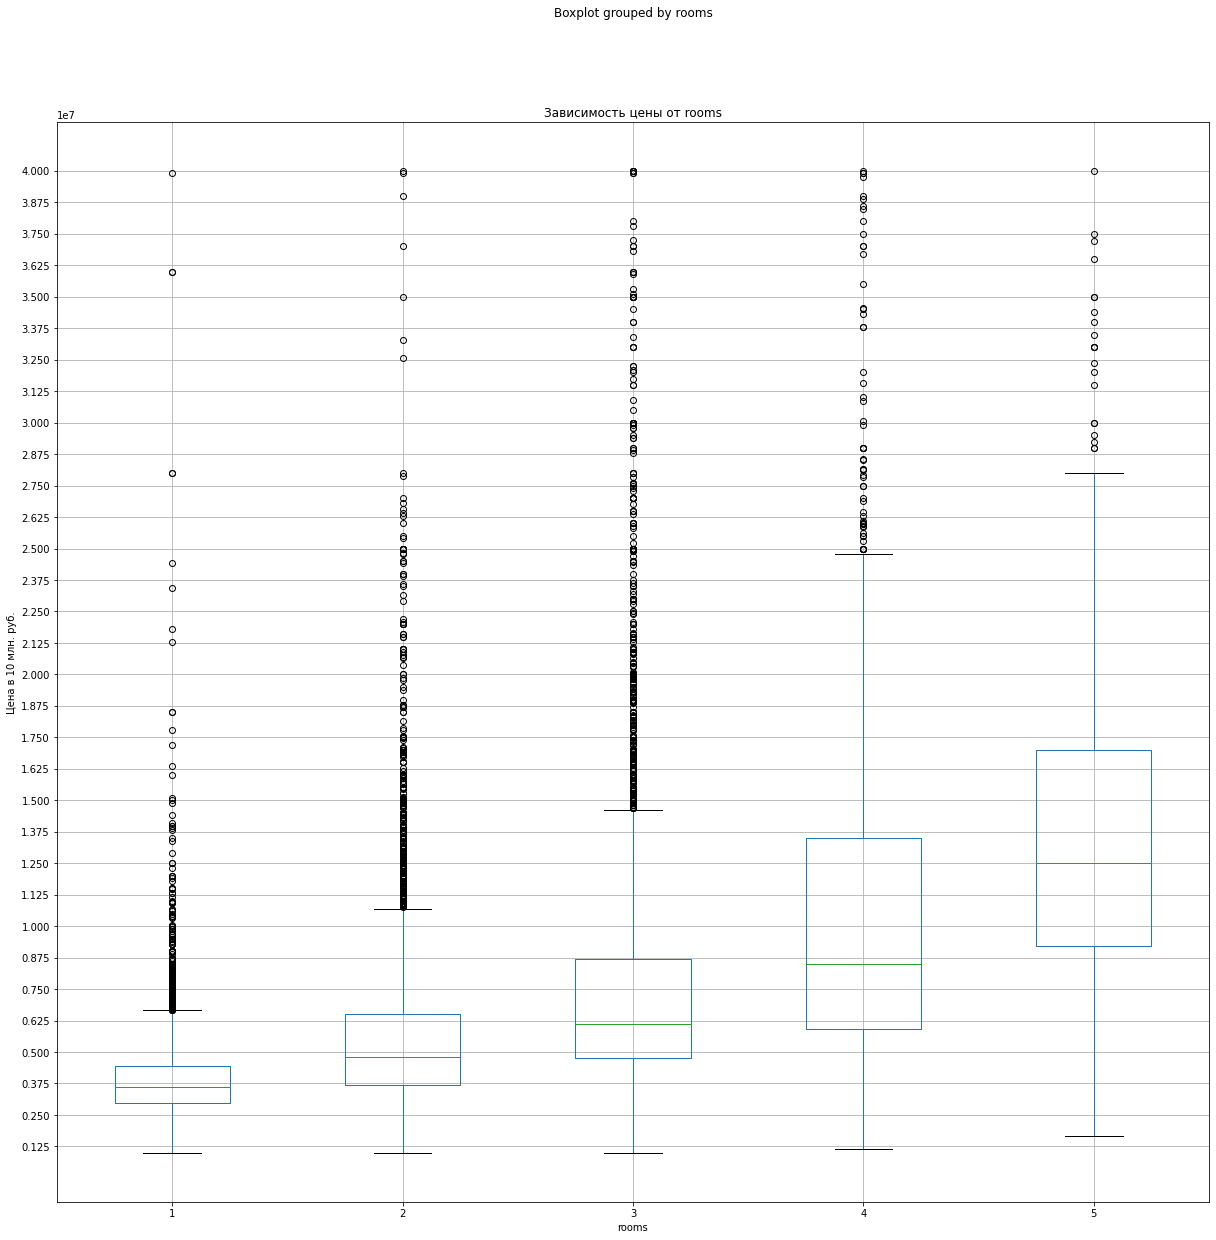

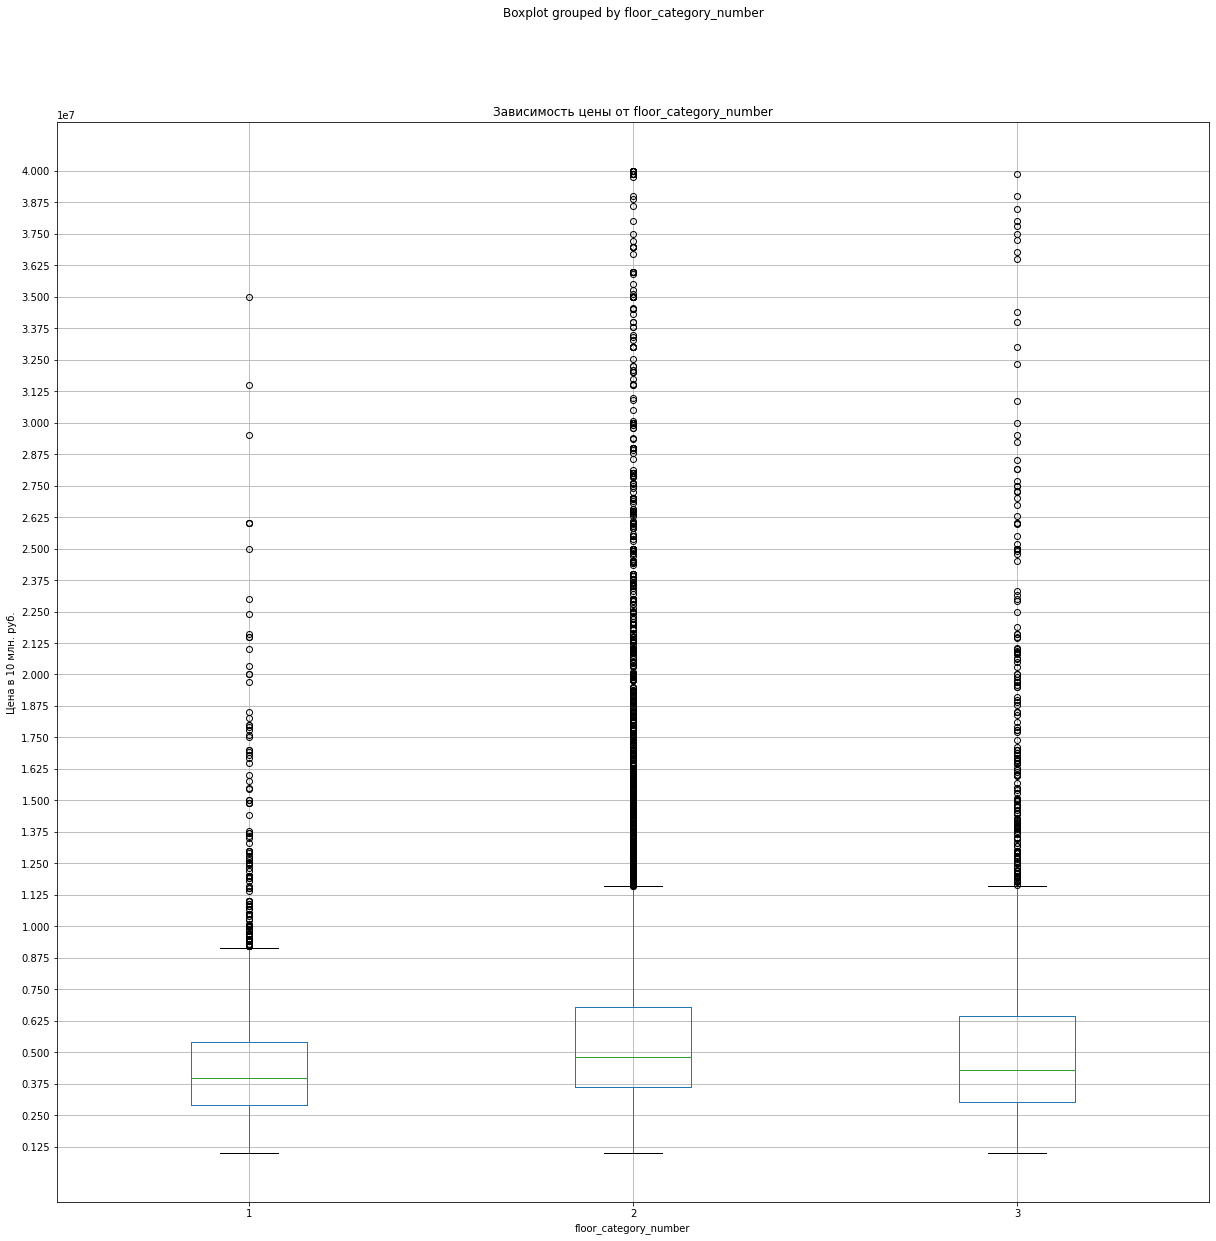

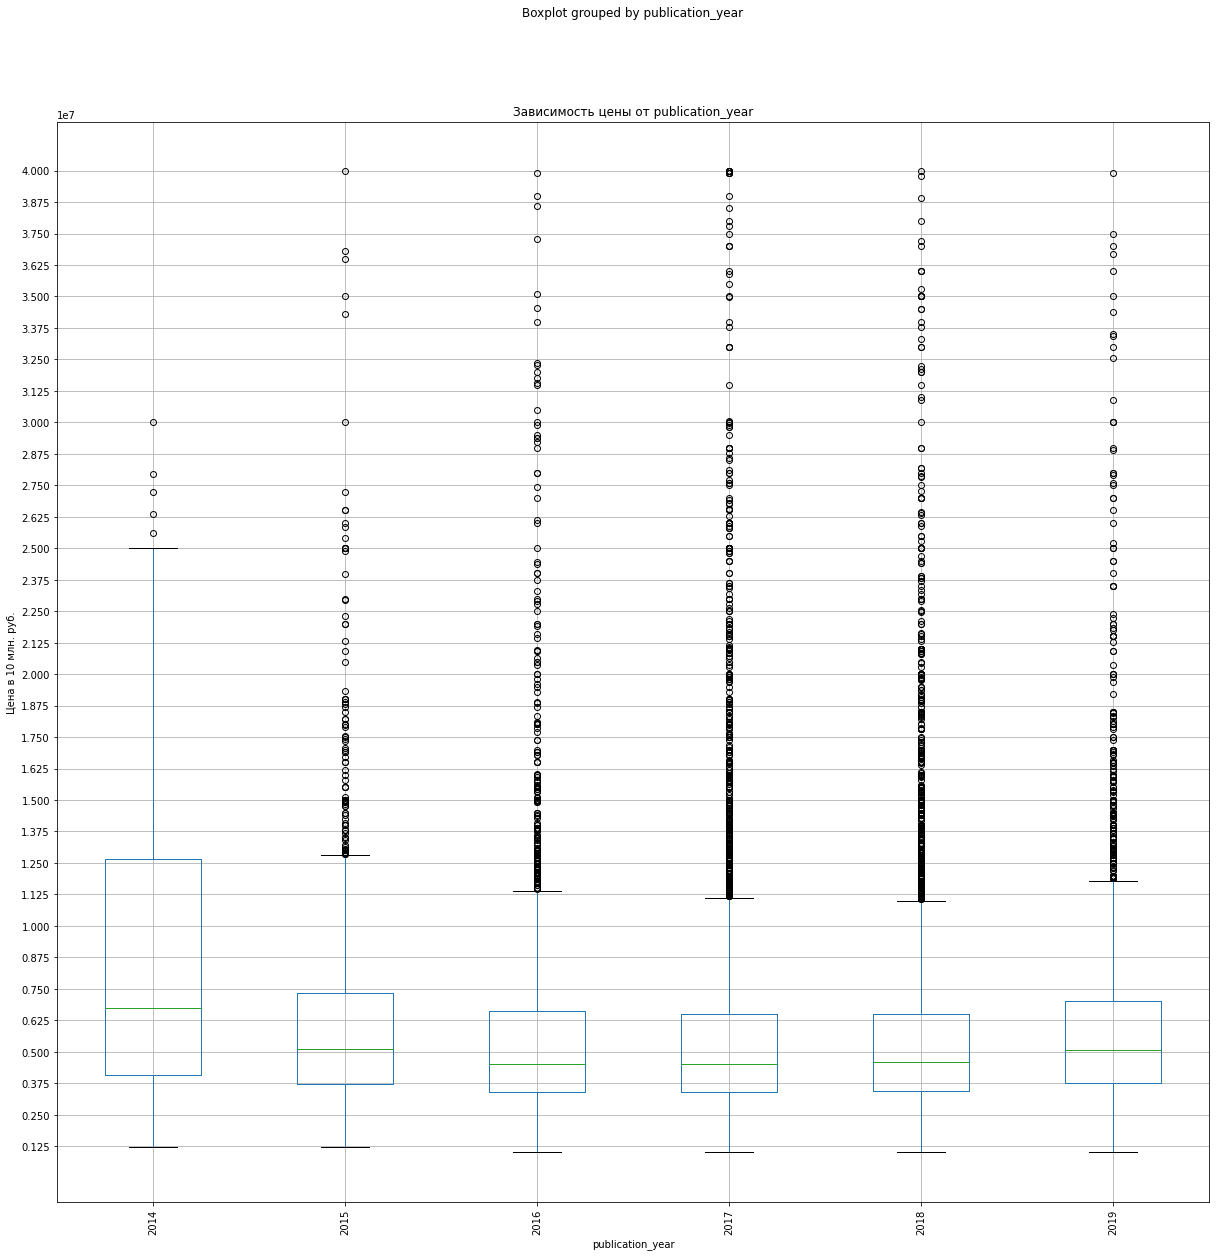

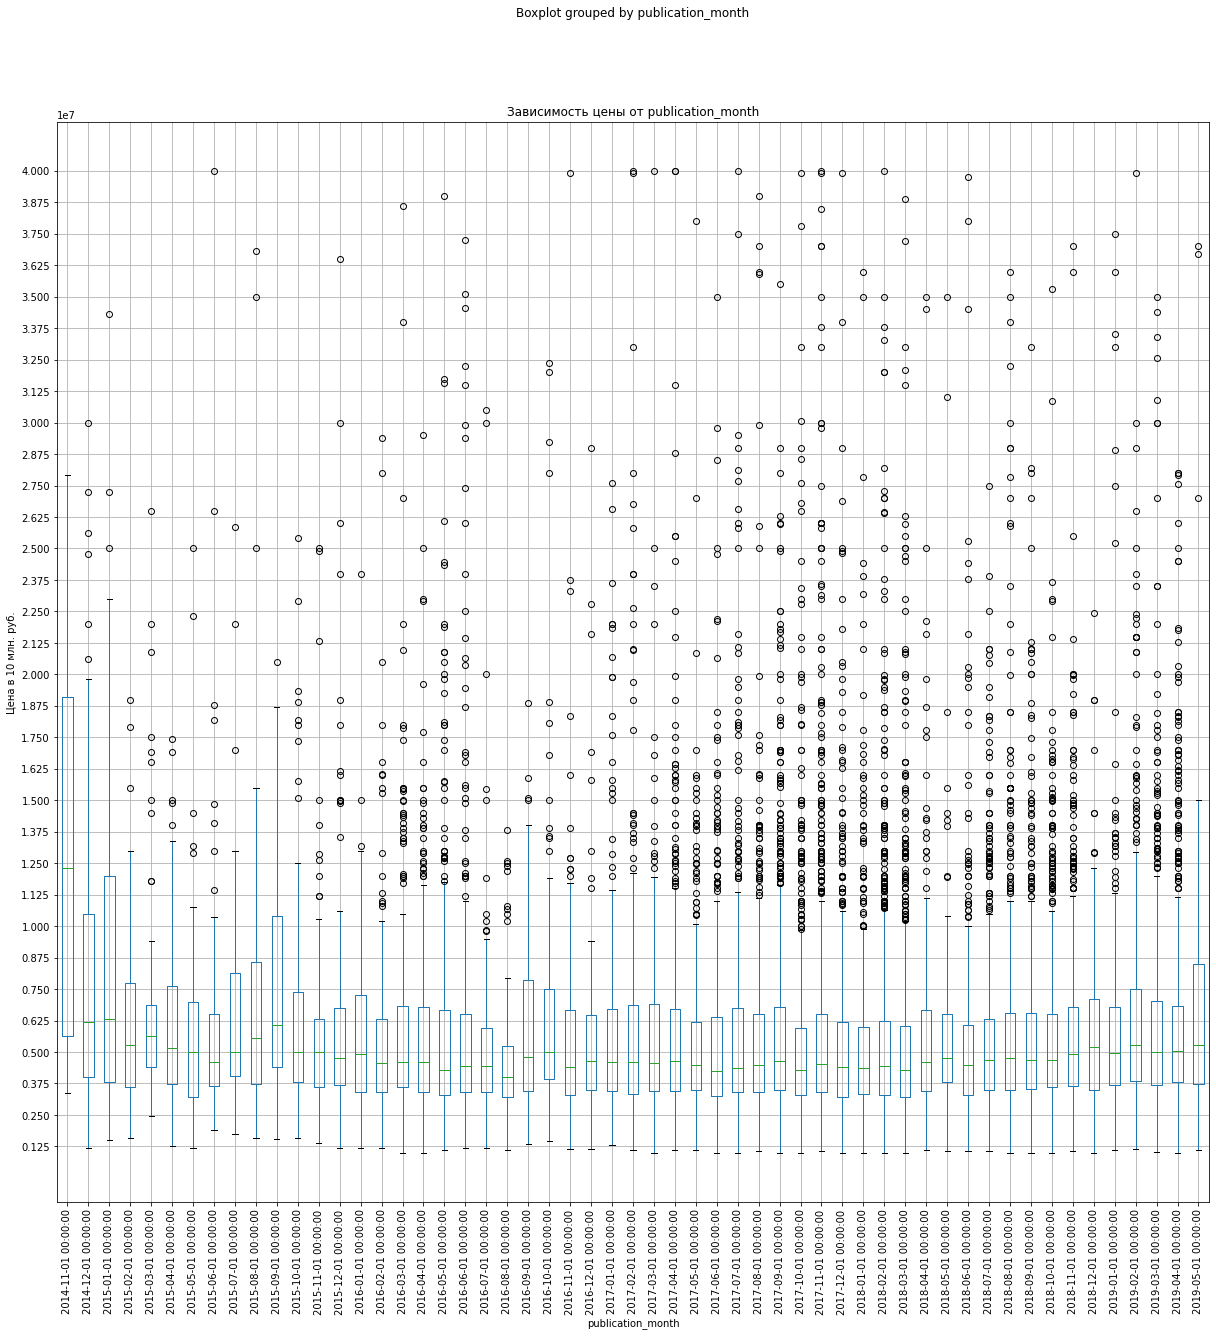

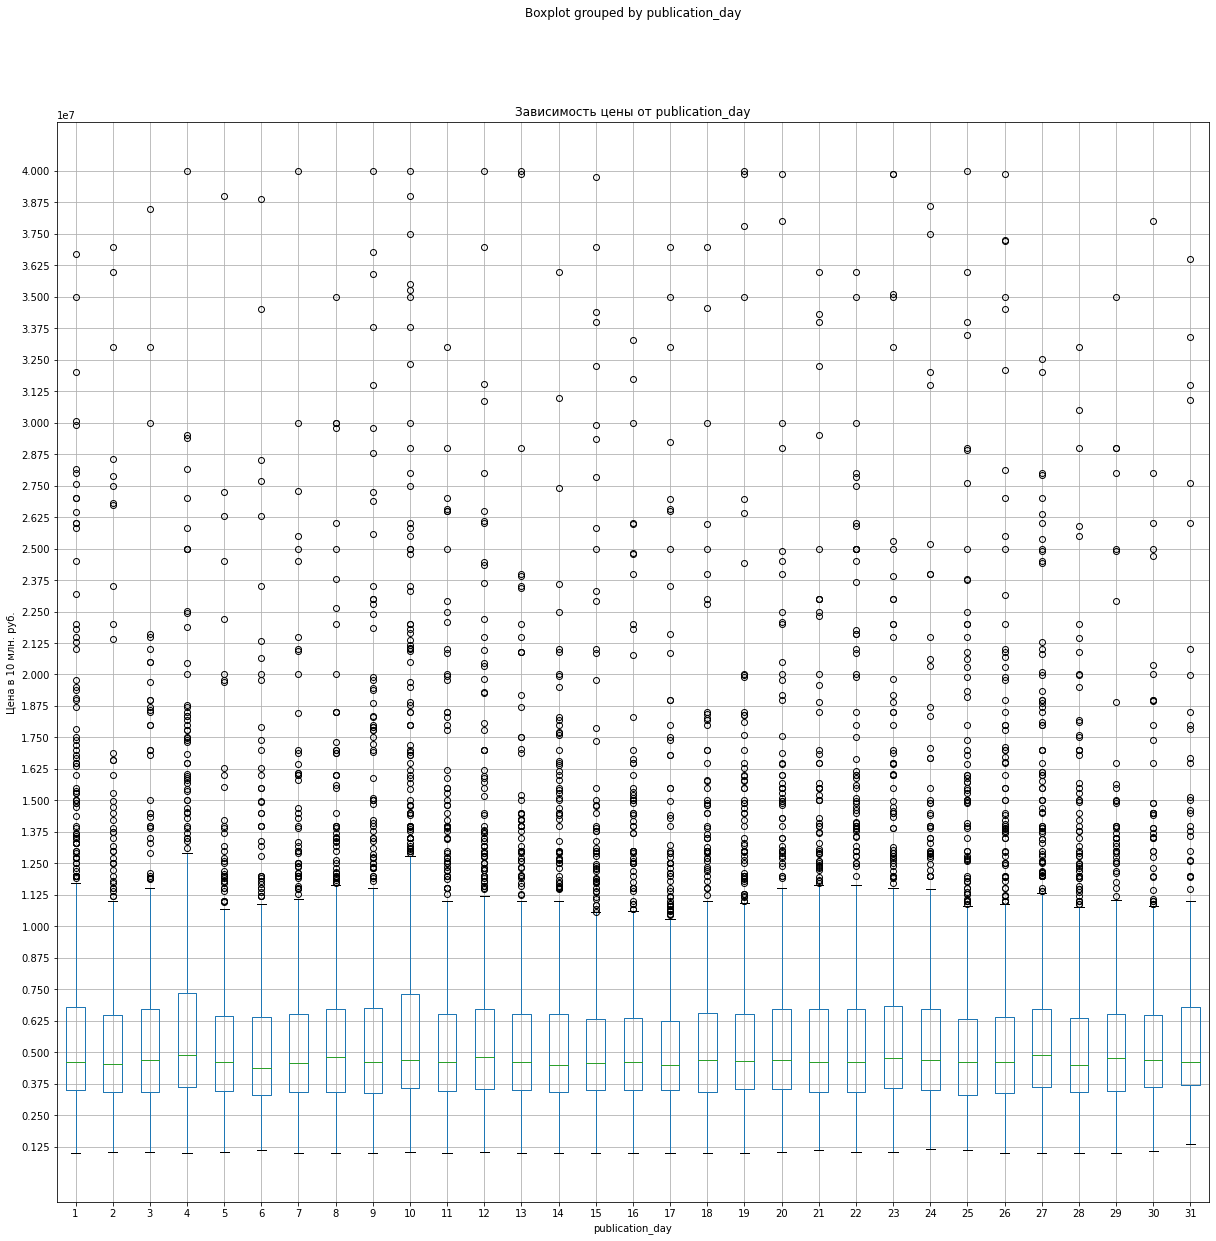

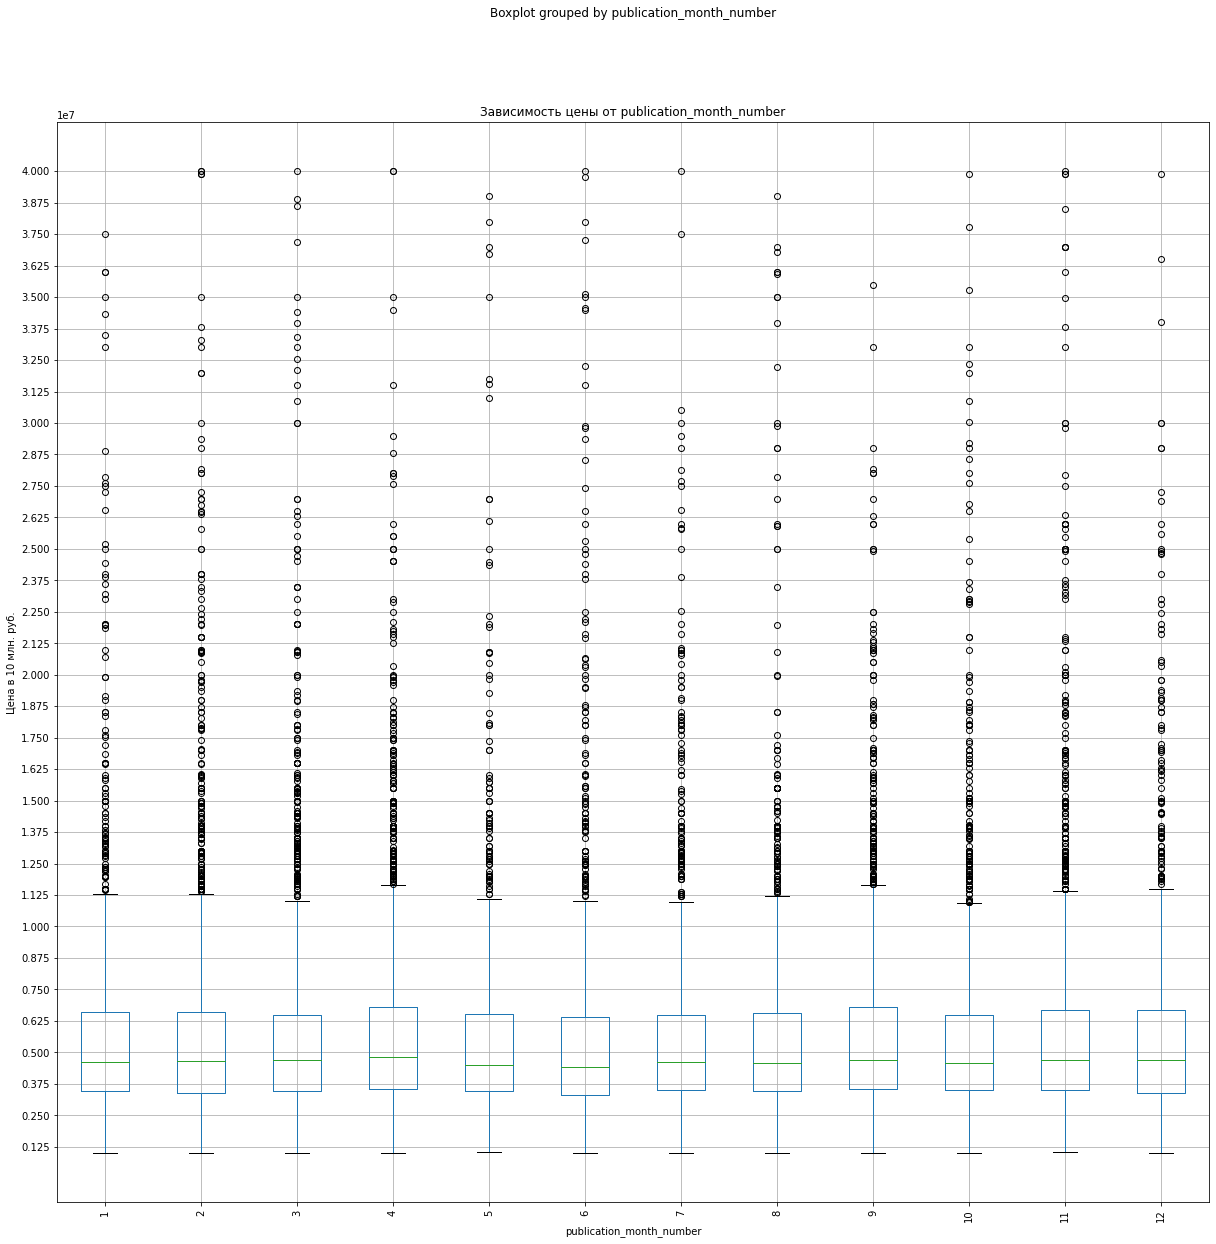

In [75]:
linear_characteristic_data = data.loc[
                                   :,
                                   [
                                       "rooms",
                                       "floor_category_number",
                                       "publication_year",
                                       "publication_month",
                                       "publication_day",
                                       'publication_month_number',
                                   ],
                                   ]

for linear_characteristic in linear_characteristic_data.columns:
    data.boxplot(column="last_price", by=linear_characteristic, figsize=(20, 20))
    plt.title(f"Зависимость цены от {linear_characteristic}")
    plt.yticks([i*1250000 for i in range (1,33)])
    plt.ylabel("Цена в 10 млн. руб.")
    plt.xlabel(linear_characteristic)
    if 'month' in linear_characteristic or 'year' in linear_characteristic:
        plt.xticks(rotation=90)
    plt.show()

#### <a id='toc1_4_4_1_'></a>[Вывод раздела "Определение факторов, влияющих на стоимость квартиры"](#toc0_)

По коэффиценту Пирса видим, что стоимость квартиры коррелирует с общей площадью, жилой площадью, площадью кухни. (`total_area`, `living_area`, `kitchen_area`) Для остальных характеристик корреляцию считать некоректно так как данные линейные. 

По графику рассеяния точек видно
- При росте общей площади, жилой площади, площади кухни стоимость квартиры растет.
По диаграммам размаха видно
- При росте количества комнат цена растет практически линейно.
- Недвижимость на первом этаже обычно на 25% дешевле всех этажей кроме последнего и на 15% дешевле недвижимости на последнем этаже.
- В 2015 году цены на недвижимость сильно упали, после чего, снизившись на 10% в 2016 году и на 5% в 2017 по сравнению с 2016 постепенно начали расти
- Цена не зависит от месяца и дня публикации

### <a id='toc1_4_5_'></a>[Выбор 10 населённых пунктов с наибольшим числом объявлений](#toc0_)


Построим сводную таблицу с количеством объявлений в каждом населенном пункте и средней ценой недвижимости. Так как столбец `last_price` не имеет пропусков для каждого населенного пункта достаточно сложить все цены объявлений в это населенном пункте и разделить на количество объявлений в этом населенном пункте.


In [76]:
location_based_number_price_data = pd.pivot_table(
    data=data, index="locality_name", values="last_price", aggfunc=["count", "mean"]
)

location_based_number_price_data.columns = ["number_of_advs", "average_price"]

location_based_number_price_data.sort_values(
    by="number_of_advs", ascending=False, inplace=True
)

location_based_number_price_data.head(10)

,number_of_advs,average_price
locality_name,,
санкт-петербург,14398,6.879266e+06
мурино,535,3.769154e+06
кудрово,440,4.453715e+06
шушары,421,4.139147e+06
всеволожск,381,3.833372e+06
пушкин,356,6.132997e+06
колпино,322,3.855277e+06
гатчина,306,3.496959e+06
парголово,299,4.557650e+06


поселке Мурино (535). Самое маленькое количество объявлений в 10 в Выборге (230) и Парголово (299).

Самая высокая средняя цена недвижимости в Санкт-Петербурге (6.87 миллионов), затем в Пушкине (6.5 миллионов). Самая низкая средняя цена в Выборге (3.3 миллиона). Затем в Гатчине (3.5 миллиона).


### <a id='toc1_4_6_'></a>[Анализ стоимости жилья в Санкт-Петербурге в зависимости от удалённости до центра](#toc0_)


Создадим таблицу, в которой будут средняя цена недвижимости в зависимости от удаленности от центра города


In [77]:
spb_data = data.query("locality_name == 'санкт-петербург'")
spd_center_based_price_data = pd.pivot_table(
    data=spb_data, index="cityCenters_nearest_km", values="last_price", aggfunc="mean"
)
spd_center_based_price_data

,last_price
cityCenters_nearest_km,
1.0,1.192175e+07
2.0,1.154611e+07
3.0,9.395543e+06
4.0,1.051705e+07
5.0,1.109567e+07
6.0,1.034385e+07
7.0,1.060588e+07
8.0,8.867667e+06
9.0,6.651518e+06


Построим график зависимости средней цены недвижимости от удаленности от центра города


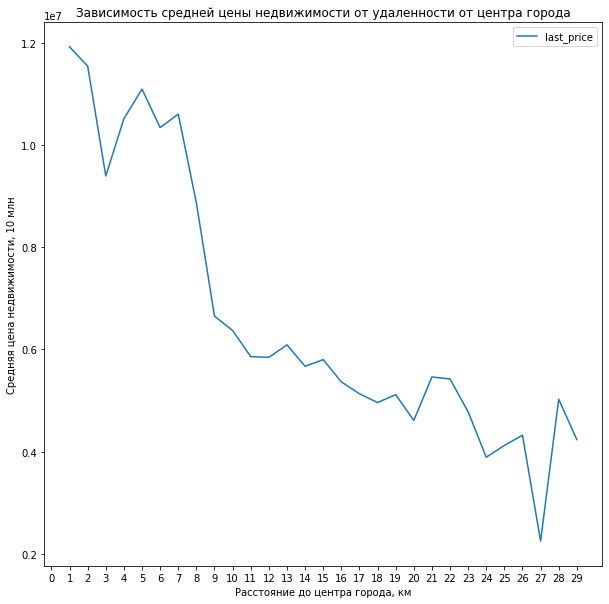

In [79]:
spd_center_based_price_data.plot(y="last_price", figsize=(10, 10))
plt.xlabel("Расстояние до центра города, км")
plt.ylabel("Средняя цена недвижимости, 10 млн")
plt.title("Зависимость средней цены недвижимости от удаленности от центра города")
plt.xticks([x for x in range(0, 30, 1)])
a = ""

#### <a id='toc1_4_6_1_'></a>[Вывод раздела "Анализ стоимости жилья в Санкт-Петербурге в зависимости от удалённости до центра"](#toc0_)

Видим, что самая дорогая недвижимость в центре города, затем цена падает (3-км), а затем растет (до 5-го). Возможно, это связано с тем, что в центре города находятся самые дорогие квартиры, а затем цена падает, так как в центре города меньше зеленых зон. После 7-го километра цена начинает падать так как из-за удаления от центра инфраструктура становится хуже.


## <a id='toc1_5_'></a>[Общий вывод](#toc0_)


1. **Загрузка данных:**<br> Загружены данные и подключены необходимые библиотеки: pandas, numpy, seaborn, mathplotlib. Исходные данные содержат 23697 строк и 22 колонки.

2. **Очистка данных:** <br>
Во всех приведенных ниже столбцах обнаружены пропуски.
- В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` - данные собирались автоматически. Пропуски оставлены, так как очевидной причины пропусков нет. Пропусков тут очень много, удаление строк с ними повлияет на дальнейшее исследование. Они вызваны недоработкой автоматизированной системы сбора данных или ошибкой при выгрузке данных.
- В столбце `days_exposition` пропуски оставлены, так как очевидной причины пропусков нет, а строк с пропусками много. Они вызваны недоработкой автоматизированной системы сбора данных или ошибкой при выгрузке.
- В столбцах `floors_total`, `locality_name` пропуски удалены, так как их количество мало и они не повлияют на дальнейшее исследование. Пропуски тут вызваны ошибкой при выгрузке данных или необязательностью заполнения полей "количество этаже", "населенный пункт" при подаче заявки на продажу.
- В столбце `balcony` пропуски заменены на 0, так как скорее всего их отсутствие означает отсутствие балкона.
- В столбце `is_apartment` пропуски заменены на False, так как скорее всего их отсутствие означает, что квартира не является апартаментами.
- В столбце `ceiling_height` пропуски заменены на медианное значение. Пропуски тут вызваны ошибкой при выгрузке данных или необязательностью заполнения поля "высота потолков" при подаче заявки на продажу.
- Столбец `living_area` на 97% коррелирует с `total_area`, поэтому пропуски в `living_area` заменены на `total_area` * 0.6 так как чаще всего площадь составляет 60% от общей площади.
- Столбец `kitchen_area` на 60% коррелирует с `total_area`, поэтому пропуски в `kitchen_area` заменены на `total_area` * 0.17 так как чаще всего площадь составляет 17% от общей площади.

3. **Преобразование данных:**
- В столбце `first_day_exposition` - для удобной обработки заменили тип данных "строка" на специальный формат даты в Pandas.
- В столбце `days_exposition` - заменили тип данных "целочисленное число" так как люди привыкли игнорировать дробную разницу между днями, например 10 и 10.5.
- В столбцах `last_price`, `floors_total`, `balcony`, `total_area`, `living_area`, `kitchen_area` - заменили тип данных на "целочисленное число".

4. **Создание новых признаков:** <br> Мы создали новые признаки на основе имеющихся данных: категория этажа `floor_category`, день недели публикации `publication_day`, месяц (зависит от года) `publication_month`, год публикации `publication_year`, категория размера квартиры `size_category`, месяц публикации цифрой `publication_month_number`. Мы также добавили столбец с расстоянием до центра города в километрах `cityCenter_nearest_km`. 

5. **Удаление выбросов:** <br> 
Мы удалили строки с аномальными значениями в столбцах `total_area`, `last_price`, `kitchen_area`, `living_area`, `ceiling_height`, `rooms`, `floors_total`, `cityCenters_nearest`, `parks_nearest`.

6. **Вклад характеристик недвижимости в стоимость.**  <br> 
Мы провели исследовательский анализ данных и выявили следующие закономерности:
Стоимость квартиры сильнее всего коррелирует с общей площадью, жилой площадью, площадью кухни. (`total_area`, `living_area`, `kitchen_area`)

    **По диаграммам размаха видно:**
- При росте количества комнат цена растет практически линейно.
- Недвижимость на первом этаже обычно на 25% дешевле недвижимости на всех этажах кроме последнего и на 15% дешевле недвижимости на последнем этаже.
- В 2015 году цены на недвижимость сильно упали (по сравнению с 2014), после чего, снизившись на 10% в 2016 году и на 5% в 2017 по (сравнению с 2016) постепенно начали расти

    **По графику рассеяния точек видно:** 
- При росте общей площади, жилой площади, площади кухни стоимость квартиры растет.

7. **Пункты с наибольшим количеством объявлений.** <br> 
Мы определили 10 населенных пунктов с наибольшим количеством объявлений. 
Больше всего объявлений (14440) было в Санкт-Петербурге, за ним следовали Мурино и Шушары. В Санкт-Петербурге также была самая высокая средняя стоимость квартир (6.8 млн), за ним следовали Пушкин и Парглово (6.1 млн и 4.55 млн соответственно). Самая низкая средняя стоимость квартир была в Выборге (3.3 млн).

8. **Анализ цен на квартиры в Санкт-Петербурге в зависимости от расстояния до центра.** <br> 
Мы проанализировали взаимосвязь между ценами на квартиры и расстоянием от центра города в Санкт-Петербурге. Обнаружили, что цены на квартиры самые высокие в центре города, цены падают при удалении от 1 киллометра до 3-го снижаются по мере удаления от центра.


**Что было сделано с точки зрения Data-scientista**
- Опираясь на данные было заполнено n-ое количество пропускв
- Было построено более 30 графиков по которым были сделаны выводы
- Созданы 4 столбца с новыми характеристиками
- Удалены дубликаты и неявные дубликаты, что позволит обучать ИИ на качественных данных
- И не только